# **Project 2**, APS1070 Fall 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model [13 Marks]**

**Deadline: OCT 22, 9 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Ali Yassine
*   Student Number: 1008618113

##**Part 1: Getting started [1.5 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? 284807 **[0.1]**
* What features in the dataset are present aside from the 28 main features?  Time of the transaction and Amount  are the two  features present aside from the 28 main features.   **[0.1]** 
* Which column contains the targets? **[0.1]**
The last column contains the class which is the target ( 0 or 1).
* To what do the target values correspond? **[0.1]**
 to the class 0 (normal transaction) and 1 (fraudulant transaction)

In [1]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=f94f3a6b449d28e40cae9342b4d05e65335ed7bf48ee331d56d0bf569012aacb
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [5]:
### YOUR CODE HERE ###
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



* What is the percentage of entries in the dataset for each class? Class 0 is 99.8273 % Class 1 is 0.1727 % **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?Unbalanced since more  since in nature transaction that are non fraudulant are more common than fraudalent one. So in the data collection we have more 0 than 1. more data is avalaible for casual non fradulant transactions. **[0.1]** 
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.2]**

If the training set was imbalanced,  the probability that the k nearest neighbors of a random query point will belong to the class with more examples becomes higher. This statement is logical since the closest neighbor of the test point (query) may still belong to the class with less examples, but if rest (k-1) points belong to the other class  the point is more likely to get misclassified. Most of the classified points will be of Class 0. one can argue that a 1-nearest neighbor approach might gives better results but not so optimal. this is why we should fit Gaussians  

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

In [11]:
### Split the data  ###
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.15, random_state=0)

# 15 % of training is validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=(0.15/0.85), random_state=0)

In [12]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(199364, 30) (199364,)
(42721, 30) (42721,)
(42722, 30) (42722,)


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

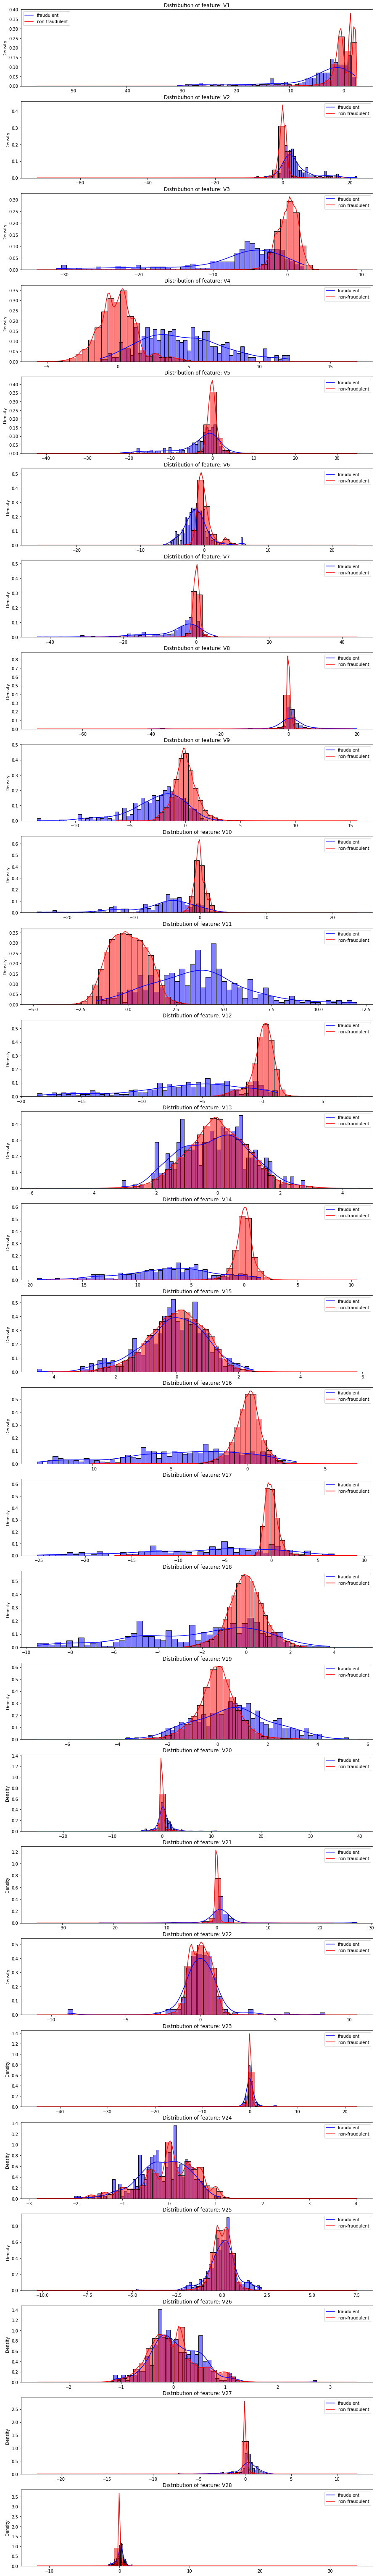

In [13]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

Using these graphs could provide meaningful information they show the probability distribution functions of all the different features with Gaussians distribution fraudulent and non faudulant data. 
What we can notice that some features does not differenciates well between fradulent and non fraudulents data points since both Gaussian distribution have approx.  = means and variances and indeed small corrolation! Like v15,v23. I cannot tell from probas which point is Fraud/non fraud since both Distributions are "each one another" and have almost the same shape. Some other features are really good at differenciating fradulents and non fraudulent transactions such as V17 and V14 they allow to distinguish both transaction since the gaussians distribution are far so they have different variance and different means.
I belive that those features will give better predictions when used. In part 5 this will  be proved also with corrolation relative to the class (0 and 1).
We can also have an idea of how many gaussian (components/clusters) to fit on each feature by looking at the data distribution.

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. 
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-fraudulent transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





A

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from tabulate import tabulate
from prettytable import PrettyTable 
from sklearn.metrics import f1_score

#1 fitting a single gaussian distribution
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train)

#2
p_gm_train = gm.score_samples(X_train)
p_gm_val=gm.score_samples(X_val)
print ("AUC of Training dataset" , format(  roc_auc_score(y_train, 1-p_gm_train)     , ".3f")  )
print ("AUC of Validation set " , format(  roc_auc_score(y_val, 1-p_gm_val)  , ".3f")  )

#3 each feature
features=[f for f in df.columns if 'V' in f]

auc_features_train=[]
auc_features_val=[]
mytable = PrettyTable(["Feature Name", "AUC score on training features", "AUC score on validation features"])
for i, feat in enumerate(features):
  gm2 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
  gm2.fit(X_train[feat].to_numpy().reshape(-1,1))
  auc_features_train.append(roc_auc_score(y_train, 1- gm2.score_samples(X_train[feat].to_numpy().reshape(-1,1))))
  auc_features_val.append(roc_auc_score(y_val, 1- gm2.score_samples(X_val[feat].to_numpy().reshape(-1,1))))
  mytable.add_row([feat, auc_features_train[i], auc_features_val[i]]) 

#put them in a Table
print(mytable)

#4.Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set.
d = {'Features': features,'AUC_train':auc_features_train, 'AUC_val': auc_features_val}
df_2 = pd.DataFrame(data=d)
df_2['AUC_val'].nlargest(3)
print("The 3 features to distinguish fraudulent transactions from non-fraudulent: ")
df_2.iloc[df_2['AUC_val'].argsort()[-3:]]


AUC of Training dataset 0.952
AUC of Validation set  0.945
+--------------+--------------------------------+----------------------------------+
| Feature Name | AUC score on training features | AUC score on validation features |
+--------------+--------------------------------+----------------------------------+
|      V1      |       0.704715046152276        |        0.731833177423688         |
|      V2      |       0.8481040032232954       |        0.8379607613748924        |
|      V3      |       0.8800417618595918       |         0.83236922380811         |
|      V4      |       0.894415816285186        |        0.8714869166132704        |
|      V5      |       0.7609067436188568       |        0.8165806744971263        |
|      V6      |       0.7346528103088833       |        0.7215070471903892        |
|      V7      |       0.8629824725175215       |        0.8726385642321692        |
|      V8      |       0.7725154903108282       |        0.8280975227855062        |
|     

,Features,AUC_train,AUC_val
16,V17,0.927538,0.925703
11,V12,0.912838,0.928006
13,V14,0.949740,0.955297


In [15]:
#5.
# Make a prediction based on a model's scores: If the score_samples is lower than a threshold,
# we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score 
#of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!)
# Compute F1 score using sklearn.metrics.f1_score. 
def findthebest_th(featurename,X_train):
  gm_=GaussianMixture(n_components=1,covariance_type='full',random_state=0,)
  gm_.fit(X_train[featurename].to_numpy().reshape(-1,1))
  c=gm_.score_samples(X_val[featurename].to_numpy().reshape(-1,1))
  sorted_c=sorted(c)

  max_so_far=f1_score(y_val,c<int(sorted_c[0]))
  for i in range(int(sorted_c[0]),0,1):
    thresh=i
    x=f1_score(y_val,c<thresh)
    if x > max_so_far :
              max_so_far = x
              temp=thresh
  return temp,max_so_far
    
temp_17,max_so_far_17=findthebest_th('V17',X_train) 
temp_12,max_so_far_12=findthebest_th('V12',X_train) 
temp_14,max_so_far_14=findthebest_th('V14',X_train)

print("The best threshold for V17 has a value of: ",temp_17," for a f1_score of ",max_so_far_17)
print("The best threshold for V12 has a value of: ",temp_12," for a f1_score of ",max_so_far_12)
print("The best threshold for V14 (best feature) has a value of: ",temp_14," for a f1_score of ",max_so_far_14)

The best threshold for V17 has a value of:  -22  for a f1_score of  0.5614035087719298
The best threshold for V12 has a value of:  -13  for a f1_score of  0.6285714285714286
The best threshold for V14 (best feature) has a value of:  -23  for a f1_score of  0.6166666666666668


6. 
- Sorting the array using nlogn since sort function in python uses Timsort https://www.geeksforgeeks.org/timsort/ which have an average time complexity of nlogn. this will dominate our algorithm (our method). the core of it 
- Then the other computations are bounded by  nlogn 
- Time complexity of method = nlogn + other function bounded by nlogn which is O(nlogn) 
- I could also looped from 0 tp -50 each time doing -1 step. This is also logical since the value of scoresamples are +log(probabilities) which are negative numbers . The more the probability is small the smaller is the value of scoresamples. Choosing a threshold of -900 for exam is eq to 10 to the power -900 !!! Imagine choosing this a threshold it could  miss all potential fraudualnt transactions! It migh detect some, the precision will be high but the recall wil be bad!! This is why most of our threshold will be lying between 0 and -80 so no need to loop further. I do have time to correct it but that's a cool solution also and we can then decreaase the number of steps from 1 to 0.1 for better threshold guessing. As we can see below, also looping from 0 to -minimum value alows us to find maximum f1 faster indeed (will implement it again if I have time but my method is also relatively 'fast' sorting dominates it). Check the plot below, all of them have maximum f1 in this range also. it does not make sense too have a th of -900 the precision might be high but recall will be very bad --> leading to a low f1 score. high f1 will between 0 and -80 (minimum). -80 is really a probability of 10^-80 assuming log base 10.

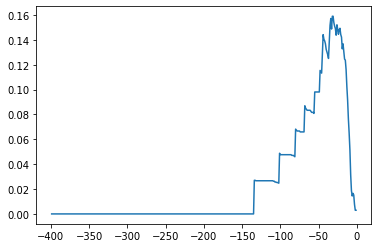

In [16]:
th_list=[]
f1_list=[]

gm_=GaussianMixture(n_components=1,covariance_type='full',random_state=0,)
gm_.fit(X_train[['V5','V6']].to_numpy())
c=gm_.score_samples(X_val[['V5','V6']].to_numpy())

for i in range(1,400,1):
  thresh=-i
  f1=f1_score(y_val,c<thresh)
  th_list.append(thresh)
  f1_list.append(f1)

#it seems that the plot have only one maximum lying between -400 and 0 
plt.plot(th_list,f1_list)

plt.show()

B.
Fitting based on class:

- Pick 3 features that had the best AUC in Part 2a.
- Compute AUC and F1 score when you fit a Gaussian only on non-fraudulent transactions (instead of all the transactions).
- Compare your results from parts 2a and 2b (AUC and F1 score) in a table. [0.8]
Are these results different or similar? Why?[0.5] They are slightly better ( the one using only non fraudulent data points). This is indeed logical since our gaussian single component (cluster) will be fitted only on non fraudulant which are the majority of data. The non fraud just adds complexity to the problem. It is like predicting the probability of a point to NOT belong to the distribution (small probability) and fitting some bad datapoints (fraudulent) to the gaussian distribution --> indirectly increasing the probability of belonging to to G.
anyway here it is minor since the 0s dominates X_train. we will also see in part5 that fitting to X_train non fraud is better.

In [17]:
# Xtrainn is our traiining data but withh classes 

In [18]:
X_nonfraud=X_train[y_train==0]

In [19]:
X_nonfraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
182195,125301.0,-0.931682,1.523828,-3.633396,-1.694770,4.105083,2.368027,0.994311,0.605614,-0.372413,-1.262666,0.422893,-0.608892,-0.694375,-2.353787,-0.469878,0.417663,1.782739,0.485688,-1.153997,-0.403653,0.125662,0.377026,-0.000521,0.518932,-0.584258,0.362449,-0.699884,-0.059828,0.76
224876,144006.0,-0.511938,0.886068,-0.887261,-1.567272,1.202824,0.639318,0.578705,0.702905,-0.112129,-0.921846,0.633761,0.973990,-0.025848,0.948684,0.161069,-0.655078,-0.247653,-0.468494,-1.214427,-0.266983,0.519449,1.661196,-0.080397,-1.609618,-0.740513,-0.484098,0.417672,0.228562,22.00
87379,61658.0,-0.437256,1.013436,1.385164,0.104689,0.022352,-0.717744,0.614956,0.070235,-0.353365,-0.546358,0.224152,-0.125627,-0.407539,-0.289897,1.172802,0.016865,0.431051,-0.635253,-0.570662,0.064062,-0.213801,-0.553767,0.081046,0.335708,-0.288279,0.082684,0.256350,0.098237,9.81
34141,37530.0,0.602693,-1.835389,0.229740,-0.327681,-1.786281,-0.717885,-0.246318,-0.036902,-0.800809,0.703522,1.089007,-0.431214,-1.845102,0.770725,0.535805,-0.812845,-0.123196,1.437185,-0.553378,0.153797,-0.428688,-1.793609,0.001054,0.465923,-0.389977,0.614444,-0.137026,0.069326,380.06
212503,138887.0,1.882698,-0.341046,-2.012547,0.383727,0.204073,-0.792401,0.139877,-0.172796,1.247554,-0.851585,-1.317804,-0.550945,-1.194493,-1.226511,0.113598,0.208336,0.932679,0.335205,0.316450,-0.053097,-0.247142,-0.704968,0.030612,-0.918575,-0.052812,-0.044403,-0.030048,-0.015644,103.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72100,54564.0,0.644536,-0.735346,0.966896,1.187694,-0.247942,2.151178,-0.815471,0.790778,0.462485,-0.164734,1.898426,1.255086,-0.308159,0.143006,1.020073,-0.752363,0.550887,-1.182652,-1.792357,0.031520,0.383374,1.037631,-0.103487,-0.989312,0.096896,-0.146717,0.105018,0.036832,157.00
191533,129300.0,-14.721087,-5.639873,-6.370625,1.256961,1.683447,-0.008973,3.760475,-2.260020,4.623213,4.699222,3.116653,-0.218771,0.182219,-5.396486,2.337182,0.937295,1.428871,-0.335906,-0.101401,-7.759591,-3.286148,0.878927,0.495948,-1.573626,1.681717,-0.559390,-3.833081,5.958154,142.74
256582,157765.0,2.217341,-0.988824,-2.606435,-2.022693,1.817339,3.166507,-1.076943,0.732535,-0.611047,0.881106,0.161660,-0.571336,0.078065,0.162917,0.827917,0.921991,0.018988,-1.443699,0.304113,0.031260,0.345956,0.905648,0.109967,0.745062,0.105038,-0.015763,-0.009606,-0.068506,5.37
49085,43905.0,-1.370390,0.351380,0.034141,-2.978553,-0.480561,0.001677,-0.390617,0.967905,-0.842401,-1.047057,-0.183055,0.230423,-0.530597,1.054418,0.525045,-1.359367,-0.235047,2.020352,-0.426020,-0.810762,-0.203675,-0.445617,-0.249419,-1.216469,0.243321,-0.765670,-0.200135,-0.095864,44.30


In [20]:
best_feature1=X_nonfraud['V17'].to_numpy().reshape(-1,1)
best_feature2=X_nonfraud['V12'].to_numpy().reshape(-1,1)
best_feature3=X_nonfraud['V14'].to_numpy().reshape(-1,1)

#on v17
#1 fitting a single gaussian distribution
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(best_feature1)

#2
p_gm_train17 = gm.score_samples(X_train['V17'].to_numpy().reshape(-1,1))
p_gm_val17=gm.score_samples(X_val['V17'].to_numpy().reshape(-1,1))
auc17t= roc_auc_score(y_train, 1-p_gm_train17)  
auc17v= roc_auc_score(y_val, 1-p_gm_val17)
print ("AUC for feature 17 of Training dataset" , format( auc17t   , ".3f")  )
print ("AUC for feature 17 of Validation set " , format( auc17v  , ".3f")  )
temp17,max_so_far17=findthebest_th('V17',X_nonfraud) 
print("The best threshold for V17 has a value of: ",temp17," for a f1_score of ",max_so_far17)
print(end='\n')

#on v12
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(best_feature2)
p_gm_train12= gm.score_samples(X_train['V12'].to_numpy().reshape(-1,1))
p_gm_val12=gm.score_samples(X_val['V12'].to_numpy().reshape(-1,1))
auc12t=roc_auc_score(y_train, 1-p_gm_train12)
auc12v=roc_auc_score(y_val, 1-p_gm_val12)
print ("AUC for feature 12 of Training dataset" , format(  auc12t    , ".3f")  )
print ("AUC for feature 12 of Validation set " , format(  auc12v , ".3f")  )
temp12,max_so_far12=findthebest_th('V12',X_nonfraud) 
print("The best threshold for V12 has a value of: ",temp12," for a f1_score of ",max_so_far12)

print(end='\n')

#on v14
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(best_feature3)
p_gm_train14 = gm.score_samples(X_train['V14'].to_numpy().reshape(-1,1))
p_gm_val14=gm.score_samples(X_val['V14'].to_numpy().reshape(-1,1))
auc14t=roc_auc_score(y_train, 1-p_gm_train14)
auc14v=roc_auc_score(y_val, 1-p_gm_val14)
print ("AUC 14 of Training dataset" , format(    auc14t  , ".3f")  )
print ("AUC 14 of Validation set " , format(    auc14v, ".3f")  )
temp14,max_so_far14=findthebest_th('V14',X_nonfraud) 
print("The best threshold for V14 has a value of: ",temp14," for a f1_score of ",max_so_far14)

print(end='\n')

AUC for feature 17 of Training dataset 0.927
AUC for feature 17 of Validation set  0.926
The best threshold for V17 has a value of:  -28  for a f1_score of  0.5614035087719298

AUC for feature 12 of Training dataset 0.914
AUC for feature 12 of Validation set  0.928
The best threshold for V12 has a value of:  -14  for a f1_score of  0.6285714285714286

AUC 14 of Training dataset 0.950
AUC 14 of Validation set  0.956
The best threshold for V14 has a value of:  -26  for a f1_score of  0.6166666666666668



In [21]:

mytable2 = PrettyTable(["Best Features Name", "AUC on (training,validation)- all ", "AUC on (training,validation)- non fraudulant ","Best f1 & th - all","Best f1 & th - non fraudulent"])
mytable2.add_row(['V17', (roc_auc_score(y_train, 1- gm2.score_samples(X_train['V17'].to_numpy().reshape(-1,1))),roc_auc_score(y_val, 1- gm2.score_samples(X_val['V17'].to_numpy().reshape(-1,1)))),(auc17t,auc17v),(temp_17,max_so_far17),(temp17,max_so_far17)]) 
mytable2.add_row(['V12',(roc_auc_score(y_train, 1- gm2.score_samples(X_train['V12'].to_numpy().reshape(-1,1))),roc_auc_score(y_val, 1- gm2.score_samples(X_val['V12'].to_numpy().reshape(-1,1)))), (auc12t,auc12v),(temp_12,max_so_far12), (temp12,max_so_far12)]) 
mytable2.add_row(['V14', (roc_auc_score(y_train, 1- gm2.score_samples(X_train['V14'].to_numpy().reshape(-1,1))),roc_auc_score(y_val, 1- gm2.score_samples(X_val['V14'].to_numpy().reshape(-1,1)))),(auc14t,auc14v),(temp_14,max_so_far14), (temp14,max_so_far14)]) 
print(mytable2)

+--------------------+------------------------------------------+-----------------------------------------------+---------------------------+-------------------------------+
| Best Features Name |    AUC on (training,validation)- all     | AUC on (training,validation)- non fraudulant  |     Best f1 & th - all    | Best f1 & th - non fraudulent |
+--------------------+------------------------------------------+-----------------------------------------------+---------------------------+-------------------------------+
|        V17         | (0.9275609518403124, 0.9256783557969737) |    (0.9269602995518853, 0.9264757647944858)   | (-22, 0.5614035087719298) |   (-28, 0.5614035087719298)   |
|        V12         | (0.9129154679748009, 0.9280456521302318) |    (0.9136095833729369, 0.9283701228002414)   | (-13, 0.6285714285714286) |   (-14, 0.6285714285714286)   |
|        V14         | (0.949726811845653, 0.9552010936745337)  |    (0.9498268427098525, 0.9560613874693298)   | (-23, 0.61666666

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). 
 3. Color the data points based on their class (non-fraudulent blue and fraudulent red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points. 
 6. Compute AUC on both training and validation sets 
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





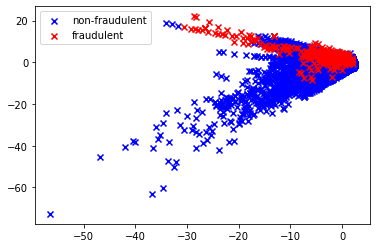

In [22]:
#1.2. and 3
X_trainf = X_train[y_train==1].to_numpy()

# V2 versus V1 
fig, ax = plt.subplots()
plt.scatter(X_nonfraud.to_numpy()[:,1],X_nonfraud.to_numpy()[:,2],c='blue',marker='x',label='non-fraudulent')
plt.scatter(X_trainf[:,1],X_trainf[:,2],c='red',marker="x",label='fraudulent')
ax.legend()
plt.show()

4. 
  As we can notice most of the data points (fraudulents and non fraudulants) are dense on one block alone. The fraudulents points in red are mostly are mostly entirely scattered on the same position. On the other hand, the non fraudulent transactions are more spread than the non fraudulent transactions.  It woul be good to fit one compenent only (dense points near each others) on the data or two since some non fraudulent points are more spread far from fraud ones.
so my answer is whether one or two depending on the best performance I willl choose. Two gave better AUCS so 2.

In [23]:
#5#6
gm = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train.to_numpy()[:,[1,2]])
#6.Compute AUC
p=gm.score_samples(X_train.to_numpy()[:,[1,2]])
p2=gm.score_samples(X_val.to_numpy()[:,[1,2]])
print('The AUC for features V1 and V2 on training data is:',roc_auc_score(y_train, 1-p))
print('The AUC for features V1 and V2 on validation data is:',roc_auc_score(y_val, 1-p2))

The AUC for features V1 and V2 on training data is: 0.885435615163275
The AUC for features V1 and V2 on validation data is: 0.8696316290436973


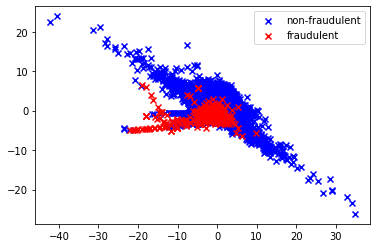

In [24]:
# V5 versus V6 plot seems 1 component is good also can try 2 but it will be slighty similar 
fig, ax = plt.subplots()
X_trainnf=X_nonfraud.to_numpy()
plt.scatter(X_trainnf[:,5],X_trainnf[:,6],c='blue',marker='x',label='non-fraudulent')
plt.scatter(X_trainf[:,5],X_trainf[:,6],c='red',marker="x",label='fraudulent')
ax.legend()
plt.show()

In [25]:
#7 Try 1:take V5 and V6
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train.to_numpy()[:,[5,6]])
#6.Compute AUC
p=gm.score_samples(X_train.to_numpy()[:,[5,6]])
p2=gm.score_samples(X_val.to_numpy()[:,[5,6]])
print('The AUC for features V5 and V6 on training data is:',roc_auc_score(y_train, 1-p))
print('The AUC for features V5 and V6 on validation data is:',roc_auc_score(y_val, 1-p2))

The AUC for features V5 and V6 on training data is: 0.8109665646801025
The AUC for features V5 and V6 on validation data is: 0.8099863290683302


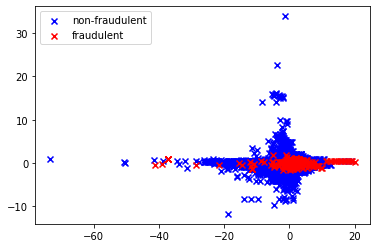

In [26]:
# V8 versus V28 plot 1 cluster=comp seems better
fig, ax = plt.subplots()
plt.scatter(X_trainnf[:,8],X_trainnf[:,28],c='blue',marker='x',label='non-fraudulent')
plt.scatter(X_trainf[:,8],X_trainf[:,28],c='red',marker="x",label='fraudulent')
ax.legend()
plt.show()

In [27]:
#Try 2: take V8 and V28
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train.to_numpy()[:,[8,28]])
#6.Compute AUC
p=gm.score_samples(X_train.to_numpy()[:,[8,28]])
p2=gm.score_samples(X_val.to_numpy()[:,[8,28]])
print('The AUC for features V8 and V28 on training data is:',roc_auc_score(y_train, 1-p))
print('The AUC for features V8 and V28 on validation data is:',roc_auc_score(y_val, 1-p2))

The AUC for features V8 and V28 on training data is: 0.8365682095628912
The AUC for features V8 and V28 on validation data is: 0.8336719437802469


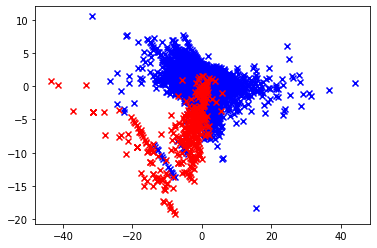

In [28]:
#v7 and v14 2 seems slightly better 
plt.scatter(X_trainnf[:,7],X_trainnf[:,14],c='blue',marker='x',label='non-fraudulent')
plt.scatter(X_trainf[:,7],X_trainf[:,14],c='red',marker="x",label='fraudulent')
ax.legend()
plt.show()

In [29]:
#Try 3: take V7 and V14
gm = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train.to_numpy()[:,[12,14]])
#6.Compute AUC
p=gm.score_samples(X_train.to_numpy()[:,[12,14]])
p2=gm.score_samples(X_val.to_numpy()[:,[12,14]])
print('The AUC for features V7 and V14 on training data is:',roc_auc_score(y_train, 1-p))
print('The AUC for features V7 and V14 on validation data is:',roc_auc_score(y_val, 1-p2))

The AUC for features V7 and V14 on training data is: 0.9610730040590563
The AUC for features V7 and V14 on validation data is: 0.9571196381407832


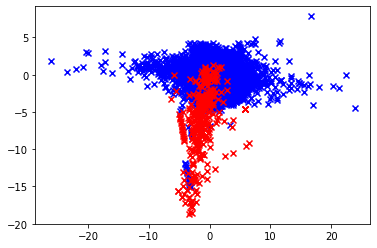

In [30]:
#try 4 for fun 6-12 1 comp is good
plt.scatter(X_trainnf[:,6],X_trainnf[:,12],c='blue',marker='x',label='non-fraudulent')
plt.scatter(X_trainf[:,6],X_trainf[:,12],c='red',marker="x",label='fraudulent')
ax.legend()
plt.show()

In [31]:
gm = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train.to_numpy()[:,[6,12]])
#6.Compute AUC
p=gm.score_samples(X_train.to_numpy()[:,[6,12]])
p2=gm.score_samples(X_val.to_numpy()[:,[6,12]])
print('The AUC for features V6 and V12 on training data is:',roc_auc_score(y_train, 1-p))
print('The AUC for features V6 and V12 on validation data is:',roc_auc_score(y_val, 1-p2))

The AUC for features V6 and V12 on training data is: 0.9040191048051547
The AUC for features V6 and V12 on validation data is: 0.9228157951726802


In [32]:
# insert the two features name same as before but upgraded 
def findthebest_th2(f1,f2,X_train,X_val):
  gm_=GaussianMixture(n_components=1,covariance_type='full',random_state=0,)
  gm_.fit(X_train[[f1, f2]].to_numpy())
  c=gm_.score_samples(X_val[[f1, f2]].to_numpy())
  sorted_c=sorted(c)

  max_so_far=f1_score(y_val,c<int(sorted_c[0]))
  for i in range(int(sorted_c[0]),0,1):
    thresh=i
    x=f1_score(y_val,c<thresh)
    if x > max_so_far :
              max_so_far = x
              temp=thresh
  return temp,max_so_far

continued

In [33]:
#8.9
temp5_6,max_so_far5_6=findthebest_th2('V5','V6',X_train,X_val) 
temp8_28,max_so_far8_28=findthebest_th2('V8','V28',X_train,X_val) 
temp7_14,max_so_far7_14=findthebest_th2('V7','V14',X_train,X_val) 
print("The best threshold for V5-V6 has a value of: ",temp5_6," for a f1_score of ",max_so_far5_6)
print("The best threshold for V8-V28 has a value of: ",temp8_28," for a f1_score of ",max_so_far8_28)
print("The best threshold for V7-V14 has a value of: ",temp7_14," for a f1_score of ",max_so_far7_14)

The best threshold for V5-V6 has a value of:  -32  for a f1_score of  0.15894039735099338
The best threshold for V8-V28 has a value of:  -41  for a f1_score of  0.07329842931937172
The best threshold for V7-V14 has a value of:  -41  for a f1_score of  0.4246575342465753


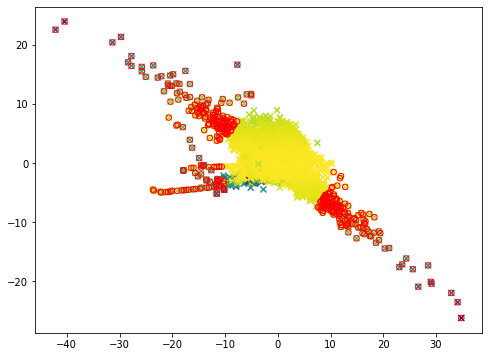

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.to_numpy()[:,5],X_train.to_numpy()[:,6],marker="x",c=p,cmap='viridis');
# Circling of anomalies
gm=GaussianMixture(n_components=1,covariance_type='full',random_state=0,)
gm.fit(X_train[['V5', 'V6']].to_numpy())
c=gm.score_samples(X_train[['V5', 'V6']].to_numpy())
outliers = np.nonzero(c<temp5_6)[0]
plt.scatter(X_train.to_numpy()[outliers,5],X_train.to_numpy()[outliers,6],marker="o",facecolor="none",edgecolor="r",s=30)
plt.show()

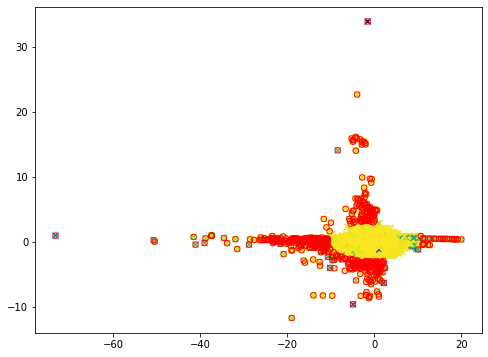

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.to_numpy()[:,8],X_train.to_numpy()[:,28],marker="x",c=p,cmap='viridis');
# Circling of anomalies
gm=GaussianMixture(n_components=1,covariance_type='full',random_state=0,)
gm.fit(X_train[['V8', 'V28']].to_numpy())
c=gm.score_samples(X_train[['V8', 'V28']].to_numpy())
outliers = np.nonzero(c<temp8_28)[0]
plt.scatter(X_train.to_numpy()[outliers,8],X_train.to_numpy()[outliers,28],marker="o",facecolor="none",edgecolor="r",s=30)
plt.show()

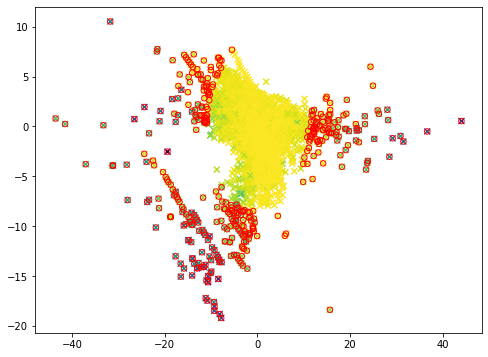

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.to_numpy()[:,7],X_train.to_numpy()[:,14],marker="x",c=p,cmap='viridis');
# Circling of anomalies
gm=GaussianMixture(n_components=1,covariance_type='full',random_state=0,)
gm.fit(X_train[['V7', 'V14']].to_numpy())
c=gm.score_samples(X_train[['V7', 'V14']].to_numpy())

outliers = np.nonzero(c<temp7_14)[0]
plt.scatter(X_train.to_numpy()[outliers,7],X_train.to_numpy()[outliers,14],marker="o",facecolor="none",edgecolor="r",s=30)
plt.show()

v6 and v12

In [37]:
temp6_12,max_so_far6_12=findthebest_th2('V6','V12',X_train,X_val) 

In [38]:
print(temp6_12,max_so_far6_12)

-21 0.46715328467153283


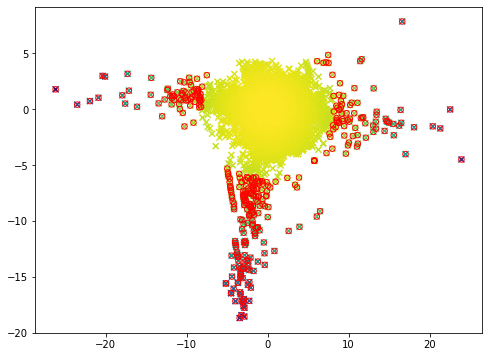

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.to_numpy()[:,6],X_train.to_numpy()[:,12],marker="x",c=p,cmap='viridis');
# Circling of anomalies
gm=GaussianMixture(n_components=1,covariance_type='full',random_state=0,)
gm.fit(X_train[['V6', 'V12']].to_numpy())
c=gm.score_samples(X_train[['V6', 'V12']].to_numpy())

outliers = np.nonzero(c<temp6_12)[0]
plt.scatter(X_train.to_numpy()[outliers,6],X_train.to_numpy()[outliers,12],marker="o",facecolor="none",edgecolor="r",s=30)
plt.show()

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**
  All below explained and mentionned in the code

In [40]:
#need to loop no other way
#for validation
f1_clist=[]
X_valnumpy=X_val.to_numpy()
features=[f for f in df.columns if 'V' in f]

for i, feat in enumerate(features):
    G1 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )

    G1.fit(X_train[feat][y_train==0].to_numpy().reshape(-1,1))
    G2= GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
    G2.fit(X_train[feat][y_train==1].to_numpy().reshape(-1,1))

    S1=G1.score_samples(X_val[feat].to_numpy().reshape(-1,1))
    S2=G2.score_samples(X_val[feat].to_numpy().reshape(-1,1))

    for c1 in np.arange(0.0, 10, 0.1):
      f1=f1_score(y_val,S1<c1*S2)
      f1_clist.append((c1,feat,f1))



In [41]:
#for training 
f2_clist=[]
X_valnumpy=X_val.to_numpy()
features=[f for f in df.columns if 'V' in f]

for i, feat in enumerate(features):
    G1 = GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
    G2= GaussianMixture(n_components = 1,covariance_type = 'full', random_state=0, )
    G1.fit(X_train[feat][y_train==0].to_numpy().reshape(-1,1))
    G2.fit(X_train[feat][y_train==1].to_numpy().reshape(-1,1))

    S1t=G1.score_samples(X_train[feat].to_numpy().reshape(-1,1))
    S2t=G2.score_samples(X_train[feat].to_numpy().reshape(-1,1))
    
    f1t=f1_score(y_train,S1t<5.9*S2t)
    f2_clist.append((5.9,feat,f1t))


to find the maximum in the list containing c,feat,f1 score respestively 

In [42]:
def finmax(l):
  maxi=l[0][2]
  temp=0
  for i in range(0,len(l)):
    if l[i][2]>maxi:
      maxi=l[i][2]
      feature_n=l[i][1]   
      c_number=l[i][0] 
  return maxi,feature_n,c_number

In [43]:
bestf1_2gauss,bestfeature_2gauss,bestc_2gauss=finmax(f1_clist)
print('The best F1 score achieved on validation set is:',bestf1_2gauss)
print('It  was achieved using feature',bestfeature_2gauss ,'and using a c of:',bestc_2gauss)
print(end='\n')

The best F1 score achieved on validation set is: 0.6438356164383563
It  was achieved using feature V14 and using a c of: 5.9



In [44]:
bestf1_2gausst,bestfeature_2gausst,bestc_2gausst=finmax(f2_clist)
print('The best F1 score achieved on training set is:',bestf1_2gausst)
print('It  was achieved using feature',bestfeature_2gausst ,'and using a c of:',bestc_2gausst)
print(end='\n')

The best F1 score achieved on training set is: 0.6735395189003436
It  was achieved using feature V12 and using a c of: 5.9



## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraudulent ones! Why does it make sense to have multiple components for fraudulent transactions?

Yes for sure it makes sense to have multiple compenents for fraudulent ones.
Tutorial: 
5 clusters and fit a mixture of 5 Gaussians to detect outliers. If  the transaction is valid if it is close (i.e belongs to one of them) to each one of those five clusters, and it is not valid if it is not close to them (outlier detected as low probabiliy) or vice versa if our GD fits anomaly data. 
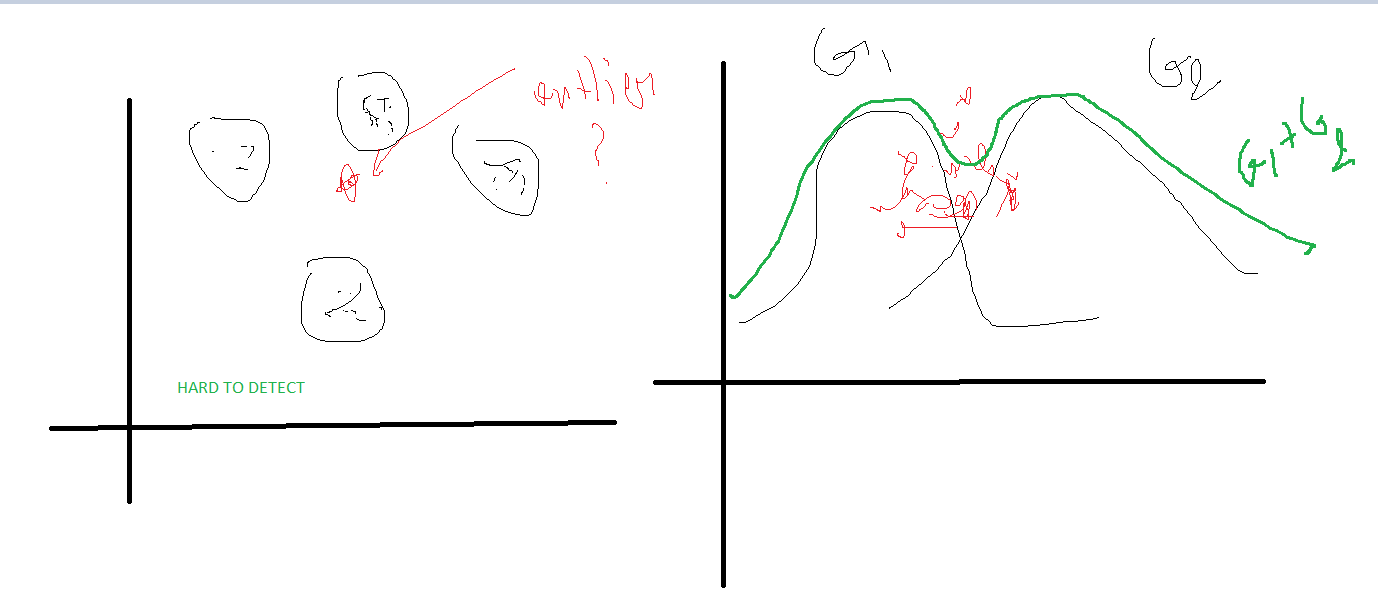But as explained in the tutorial if the fraudulent point is between the two clusters we will not be able to detect it as fradulent. This is why fitting two gaussians (a sum of gaussians) is better at predicting outliers. Image below. Also explained in lecture. As we can see from all the other questions our fraudulent data is not uniformuly distributed (non fraud is better) it is more spread so feating only 1 gaussian will not be so optimal. (the data needs to be dense). Our  outliers (fraud)in the training data are spread.

## **Now let's start testing !**

First, let's be wise while choosing features https://machinelearningmastery.com/calculate-feature-importance-with-python/ as we did in lab 1 and also we have the plots plotted in part 1 that are useful to prove if our results are correct or not. We will use a decision tree classifier, We will choose the best importance values based on part 1. This led to bad results since they did nnot make sense much. Some of themlike extra tree classifier were good since they gave a good insight. But this was expected isnce our data is unbalanced and all those classifiers needs balanced data to do good predictions! This also proves why knn performs badly for predictions on unbalanced data. They cant extract pecisely in features importance. 
This is why I got correlation and correlation matrix! The correlation between features and class is a better indicator in this case. The other features importance results are inconsistent from classifier to another but they predicted some imporant features as features 17 and 14 proving our results in part 2.

In [45]:
# decision tree for feature importance on a classification problem

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.ensemble import ExtraTreesClassifier
import operator


def getimportance(mod,x,y):
  imp_list=[]
  if mod=='dt':
    model=tree.DecisionTreeClassifier(random_state=0)
  elif mod=='extratree':
    model=ExtraTreesClassifier(random_state=0)
  elif mod=='xgb':
    model = XGBClassifier(random_state=0)
  model.fit(x, y)
  # get importance
  importance = model.feature_importances_

  for i,v in enumerate(importance):
    imp_list.append((i+1,v))

  imp_list=sorted(imp_list, key=operator.itemgetter(1), reverse=True)  

  return imp_list



In [46]:
Xtrain=X_train.drop(["Time","Amount"], axis = 1)

In [47]:
imp_list_dt=getimportance('dt',Xtrain,y_train)
imp_list_exdt=getimportance('extratree',Xtrain,y_train)
imp_list_xgb=getimportance('xgb',Xtrain,y_train)

In [48]:
print("Feature importance DT list sorted for: ",imp_list_dt)
print("Feature importance ExtraTree list sorted for: ",imp_list_exdt)
print("Feature importance XGB list sorted for: ",imp_list_xgb)

Feature importance DT list sorted for:  [(17, 0.5397026326619261), (14, 0.0965020054959308), (10, 0.08530075604119282), (27, 0.027482469226039835), (26, 0.02575456594059029), (20, 0.0196161737257102), (15, 0.01914679664754329), (21, 0.019086921007005188), (19, 0.01859425028660009), (24, 0.01642764242900038), (4, 0.01502260258202133), (13, 0.01389359934197129), (7, 0.01302787823957132), (16, 0.012698098775425031), (28, 0.012405694496177792), (12, 0.011283177370227174), (18, 0.009959200959466482), (3, 0.008329442939651023), (8, 0.006741268399630692), (1, 0.006668426220374758), (22, 0.005237605219258507), (5, 0.004972123084363252), (25, 0.004030747637615384), (11, 0.002820726958919881), (23, 0.002717410517680588), (9, 0.0025777837961065823), (2, 0.0), (6, 0.0)]
Feature importance ExtraTree list sorted for:  [(14, 0.12684251349157713), (17, 0.12567917289947986), (12, 0.11478107511749565), (16, 0.0769795847500845), (11, 0.06896590628613893), (10, 0.05680515703718289), (18, 0.048641269346993

Let's also as we have learned correlation see the most features that are corrolated with the class and other features. We will use all the dataset here.

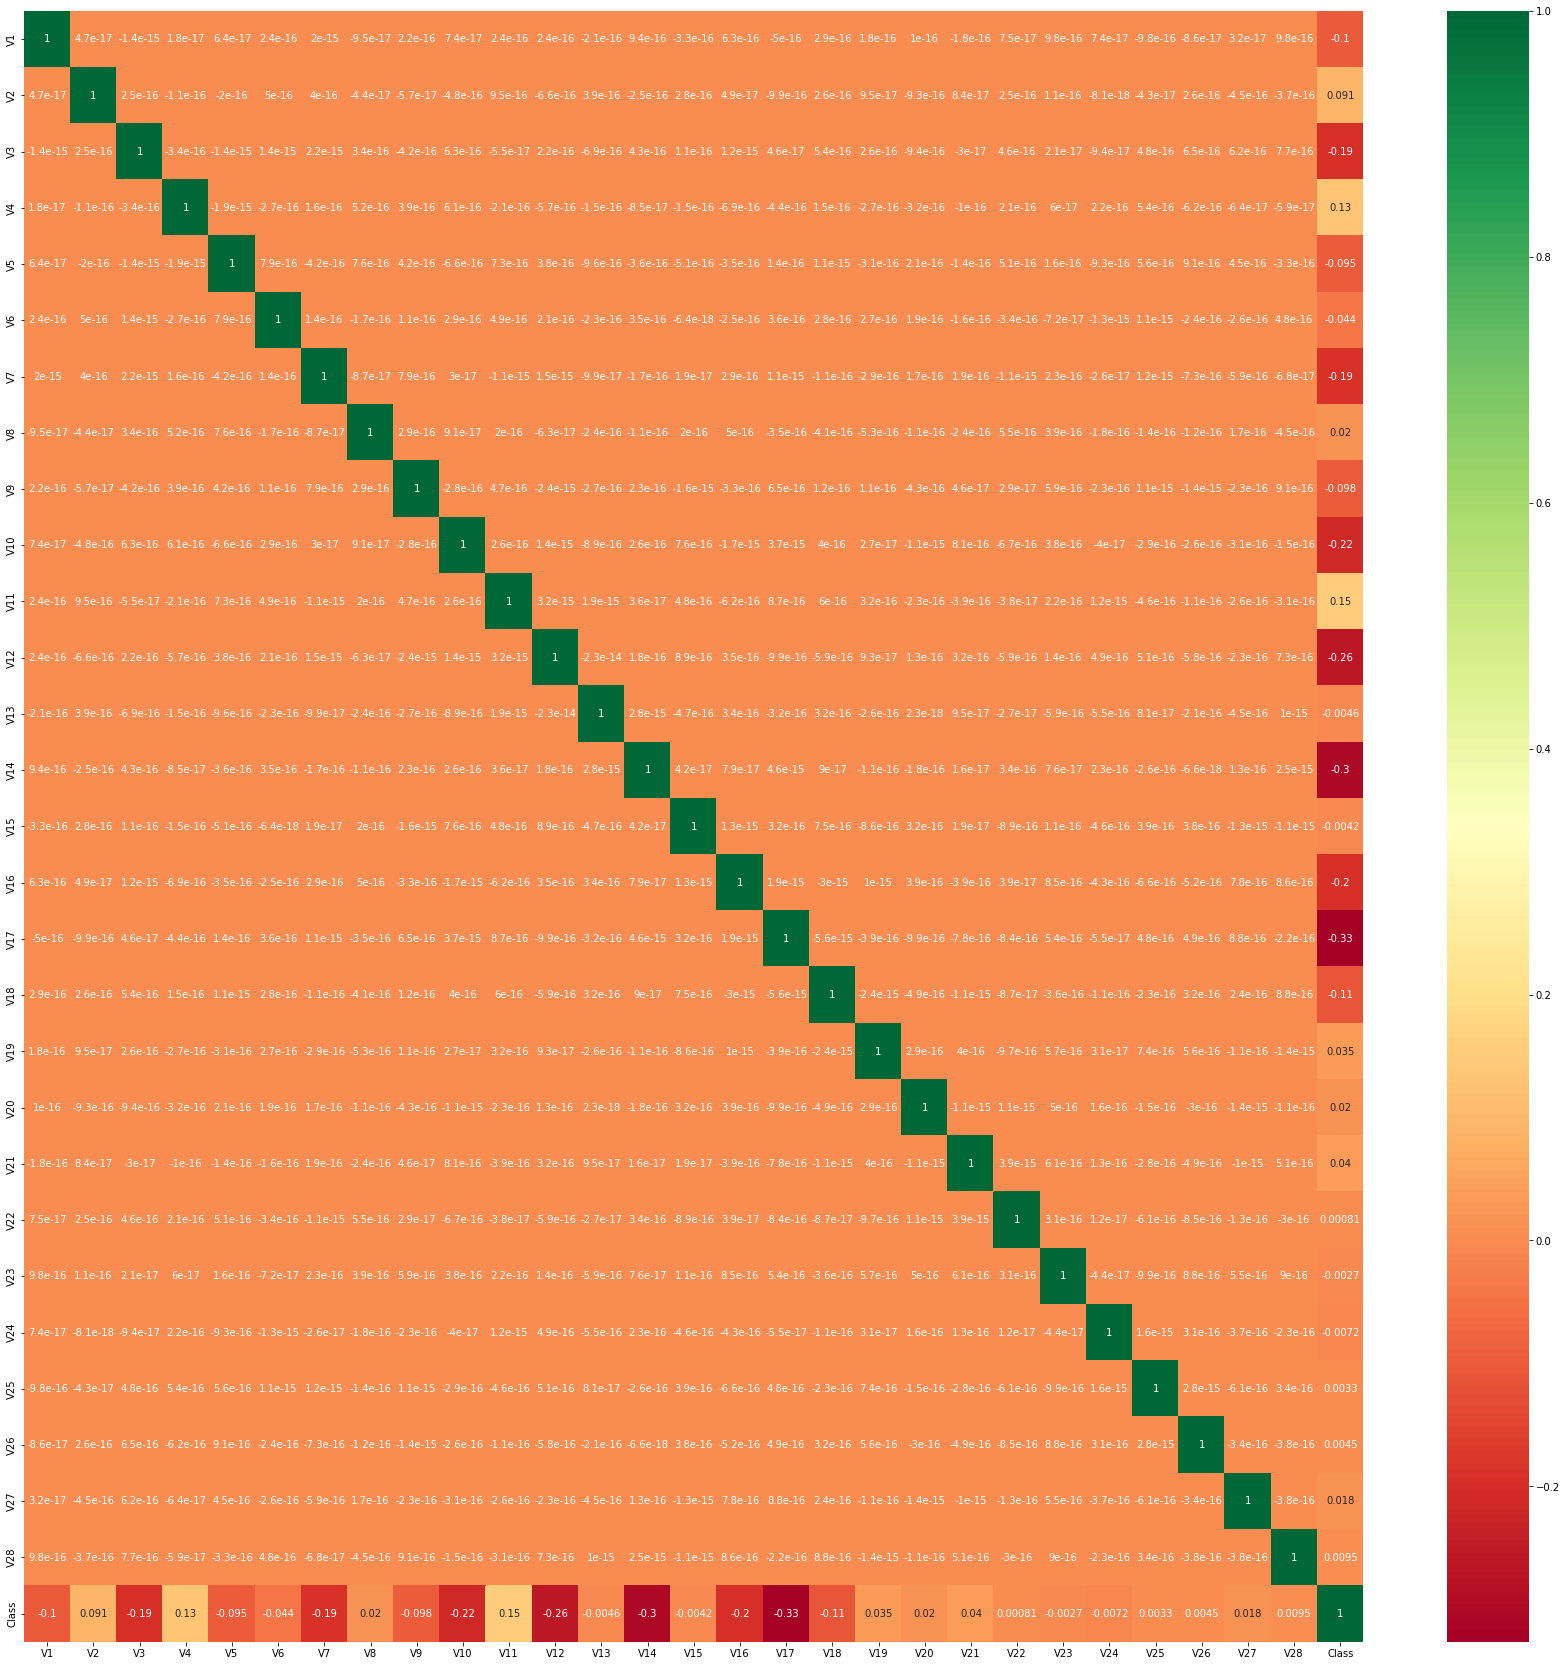

In [49]:
datawithclass=df.drop(['Time','Amount'],axis=1)
correlation_matrix = datawithclass.corr()
top_feat = correlation_matrix.index
plt.figure(figsize=(30,30))
#plot the matrix using sns heatmap
g=sns.heatmap(datawithclass[top_feat].corr(),annot=True,cmap="RdYlGn")

Let's quantify it to look clearer using population coefficient

In [50]:
from scipy import stats
pop_cor=stats.pearsonr(X_train.to_numpy()[:,0] ,y_train)

In [51]:
pop_cor[1]

2.2756873593652024e-07

In [52]:
X_train.to_numpy()[1]

array([ 1.44006000e+05, -5.11938343e-01,  8.86067821e-01, -8.87260804e-01,
       -1.56727239e+00,  1.20282417e+00,  6.39318346e-01,  5.78704930e-01,
        7.02905113e-01, -1.12129497e-01, -9.21845724e-01,  6.33761350e-01,
        9.73990314e-01, -2.58475982e-02,  9.48684431e-01,  1.61069141e-01,
       -6.55078130e-01, -2.47652922e-01, -4.68494302e-01, -1.21442718e+00,
       -2.66983019e-01,  5.19448663e-01,  1.66119603e+00, -8.03969903e-02,
       -1.60961770e+00, -7.40512707e-01, -4.84098337e-01,  4.17672225e-01,
        2.28561909e-01,  2.20000000e+01])

In [53]:
from scipy import stats
features=[f for f in df.columns if 'V' in f]
pop_coeflist=[]
for feat in features:
    pop_cor=stats.pearsonr(X_train[feat].to_numpy(),y_train)
    #absolute value
    if float(pop_cor[0])< 0:
       pop_cor = pop_cor[0]*(-1)
    else:
      pop_cor=pop_cor[0]
      
    pop_coeflist.append((feat,pop_cor))
    print('For ',feat,'population correlation coeffiecient is', pop_cor)



For  V1 population correlation coeffiecient is 0.10357985706296005
For  V2 population correlation coeffiecient is 0.09301453951816102
For  V3 population correlation coeffiecient is 0.19769520474623017
For  V4 population correlation coeffiecient is 0.1352418247973735
For  V5 population correlation coeffiecient is 0.09994899160783813
For  V6 population correlation coeffiecient is 0.04218217325090204
For  V7 population correlation coeffiecient is 0.19202206899096114
For  V8 population correlation coeffiecient is 0.013129365308694466
For  V9 population correlation coeffiecient is 0.0987394597597962
For  V10 population correlation coeffiecient is 0.21783844473248865
For  V11 population correlation coeffiecient is 0.15539978836251137
For  V12 population correlation coeffiecient is 0.26230962260894236
For  V13 population correlation coeffiecient is 0.004341325103588026
For  V14 population correlation coeffiecient is 0.30160310812460556
For  V15 population correlation coeffiecient is 0.0053956

In [54]:
pop_coeflist_sorted=sorted(pop_coeflist, key=operator.itemgetter(1), reverse=True)  

In [55]:
pop_coeflist_sorted

[('V17', 0.32763364504471826),
 ('V14', 0.30160310812460556),
 ('V12', 0.26230962260894236),
 ('V10', 0.21783844473248865),
 ('V3', 0.19769520474623017),
 ('V16', 0.1957348453264688),
 ('V7', 0.19202206899096114),
 ('V11', 0.15539978836251137),
 ('V4', 0.1352418247973735),
 ('V18', 0.11289557373198217),
 ('V1', 0.10357985706296005),
 ('V5', 0.09994899160783813),
 ('V9', 0.0987394597597962),
 ('V2', 0.09301453951816102),
 ('V6', 0.04218217325090204),
 ('V21', 0.039187475417346705),
 ('V19', 0.033347816235459446),
 ('V20', 0.02174235361996177),
 ('V8', 0.013129365308694466),
 ('V28', 0.010175287407442961),
 ('V27', 0.008403207502599697),
 ('V24', 0.008139518843782868),
 ('V15', 0.005395644184811621),
 ('V13', 0.004341325103588026),
 ('V26', 0.0037933606420604516),
 ('V25', 0.0027373847611260223),
 ('V23', 0.0012870366928493646),
 ('V22', 0.0008826543441116473)]

- The importance extra tree calssifier gave better results than the  other two others
- as expected from part 2 V17,V14 and V12 are the top 3 features with the highest feature-class correlation. this can be also seen in plots from part 1 that they are good at differentiating the classes.
- As we see v22 and v13 are bad, they are less correlated to the class. In part 1 the fraud and non fraud dist take almost teh same values. It proves our intuition from part 1.
- We quantified what we have seen in the plots in part 
- Those population coefficient also prove the best features giving the best performance in part 2 on feature model with one Gaussian distribution  i.e V17-12 and 14.
- We will focus on V17-V14-V12-V10-V3-V16-V7-V11-V4..ect the top features that we got from our analysis ! And also try alot of different combinations 

Before starting it is smarter to combine the task that we will repeat in functions. I will combine part 2 and 3 in one function and part 4 (and 5) in another one.

In [56]:
#part 2 and part3
def Gaussian_on_whole(nb_of_components,X,X_whole,X_val,y_val,y_train,features_list):

  if len(features_list)==1:
    features_list=features_list[0]
    X_train=X[features_list].to_numpy().reshape(-1,1)
    X_val=X_val[features_list].to_numpy().reshape(-1,1)
  else: 
    X_train=X[features_list].to_numpy()
    X_val=X_val[features_list].to_numpy()



  gm=GaussianMixture(n_components=int(nb_of_components),covariance_type='full',random_state=0,)
  gm.fit(X_train)
 
  
  #calculating auc train and auc val

  if(X.shape[0]!=y_train.shape[0]):
    #if the user input the non fraudulent data 
    c_train=gm.score_samples(X_whole[features_list].to_numpy())
    c_val=gm.score_samples(X_val)
    auc_train=roc_auc_score(y_train, 1-c_train) 
    auc_val= roc_auc_score(y_val, 1-c_val)
    
  else:
    c_train=gm.score_samples(X_train)
    c_val=gm.score_samples(X_val)
    auc_train= roc_auc_score(y_train, 1-c_train)  
    auc_val= roc_auc_score(y_val, 1-c_val)

  #fiding best f1 - th
  sorted_cval=sorted(c_val)
  bestf1=f1_score(y_val,c_val<int(sorted_cval[0]))

  for i in range(int(sorted_cval[0]),0,1):
    thresh=i
    x=f1_score(y_val,c_val<thresh)
    if x > bestf1 :
      bestf1 = x
      bestth=thresh
 
  return features_list , auc_train,auc_val, bestf1, bestth

#part 4 concepts in one function
def Gaussian_FandNF(nb_of_compG1,nb_of_compG2,X,X_val,y_val,y_train,features_list):
    if len(features_list)==1:
      features_list=features_list[0]
      X_train1=X[features_list][y_train==0].to_numpy().reshape(-1,1)
      X_train2=X[features_list][y_train==1].to_numpy().reshape(-1,1)
      X_val=X_val[features_list].to_numpy().reshape(-1,1)

    else: 
      X_train1=X[features_list][y_train==0].to_numpy()
      X_train2=X[features_list][y_train==1].to_numpy()
      X_val=X_val[features_list].to_numpy()

    f1_clist=[]
    G1 = GaussianMixture(n_components = int(nb_of_compG1),covariance_type = 'full', random_state=0, )
    G1.fit(X_train1)
    G2= GaussianMixture(n_components =  int(nb_of_compG2),covariance_type = 'full', random_state=0, )
    G2.fit(X_train2)

    S1=G1.score_samples(X_val)
    S2=G2.score_samples(X_val)
  
    for c in np.arange(0.0, 10, 0.1):
      f1=f1_score(y_val,S1<c*S2)
      f1_clist.append((c,f1))

    bestf1=f1_clist[0][1]
    temp=0
    for i in range(0,len(f1_clist)):
      if f1_clist[i][1]>bestf1:
        bestf1=f1_clist[i][1]
        c_number=f1_clist[i][0] 
  
    return features_list,bestf1,c_number

**Set of Models 1 :** let's try v14 and v17! Non Fraudulant or Fraudulant we will see when plotting. As we can see it would be nice to fit 2 comp. of GM on the non fraudulent data. We will try many different combination and choose the best from the subset of model 1 containing 1.1, 1.2 ...
This part is well explained after that it will be repeated the same but I changed the features each time and did all the combination.
I will compare each set separetely and choose the best out of each set and then compare the best results together to get the best from the best subset. We will also use a loop to be able to model all the posible combinations . 

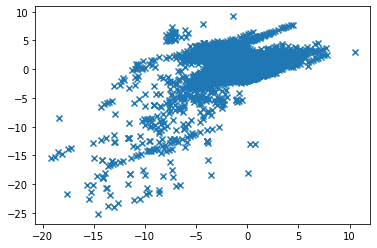

In [57]:
#all dataset 
plt.scatter(X_train["V14"].values.reshape(-1,1),X_train["V17"].values.reshape(-1,1),marker="x")

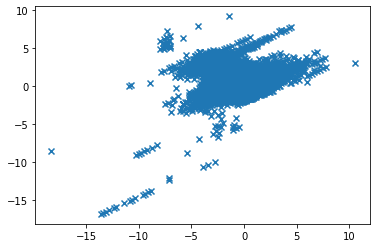

In [58]:
#only non fraudulent
plt.scatter(X_nonfraud["V14"].values.reshape(-1,1),X_nonfraud["V17"].values.reshape(-1,1),marker="x")

In [59]:
y_train.shape[0]

199364

In [60]:
features_list1_1,AUCtrain1_1,Aucval1_1, bestf1_1_1,bestth1_1 = Gaussian_on_whole(2,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17'])

In [61]:
print("Model 1.1 fitted on non fraudulent data with features-2 comp ",features_list1_1,"AUC train of ",AUCtrain1_1,"and AUC validation",Aucval1_1,"with best f1", bestf1_1_1,"achived at th=",bestth1_1)

Model 1.1 fitted on non fraudulent data with features-2 comp  ['V14', 'V17'] AUC train of  0.9610541359195376 and AUC validation 0.9603293674980111 with best f1 0.7352941176470589 achived at th= -21


In [62]:
features_list1_2,AUCtrain1_2,Aucval1_2, bestf1_1_2,bestth1_2 = Gaussian_on_whole(2,X_train,X_train,X_val,y_val,y_train,['V14', 'V17'])

In [63]:
print("Model 1.2 fitted on all data with features- 2 comp",features_list1_2,"AUC train of ",AUCtrain1_2,"and AUC validation",Aucval1_2,"with best f1", bestf1_1_2,"achived at th=",bestth1_2)

Model 1.2 fitted on all data with features- 2 comp ['V14', 'V17'] AUC train of  0.9596415166728605 and AUC validation 0.9608581207343456 with best f1 0.5899280575539567 achived at th= -10


In [64]:
features_list1_3,AUCtrain1_3,Aucval1_3, bestf1_1_3,bestth1_3 = Gaussian_on_whole(1,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17'])

In [65]:
print("Model 1.3 fitted on non fraudulent data with features-1 comp ",features_list1_3,"AUC train of ",AUCtrain1_3,"and AUC validation",Aucval1_3,"with best f1", bestf1_1_3,"achived at th=",bestth1_3)

Model 1.3 fitted on non fraudulent data with features-1 comp  ['V14', 'V17'] AUC train of  0.9588920000008493 and AUC validation 0.9609872392234435 with best f1 0.6993006993006993 achived at th= -37


In [66]:
#Model 1.4
features_list1_4,AUCtrain1_4,Aucval1_4, bestf1_1_4,bestth1_4 = Gaussian_on_whole(1,X_train,X_train,X_val,y_val,y_train,['V14', 'V17'])
print("Model 1.4 fitted on all data with features-1 comp ",features_list1_4,"AUC train of ",AUCtrain1_4,"and AUC validation",Aucval1_4,"with best f1", bestf1_1_4,"achived at th=",bestth1_4)

Model 1.4 fitted on all data with features-1 comp  ['V14', 'V17'] AUC train of  0.9599173906707736 and AUC validation 0.9599647100936425 with best f1 0.6917293233082706 achived at th= -30


In [67]:
#Model 1.5
features_list1_5,bestf1_1_5,c_number1_5=Gaussian_FandNF(1,1,X_train,X_val,y_val,y_train,['V14','V17'])
AUCtrain1_5=np.nan
Aucval1_5=np.nan

In [68]:
print("Model 1.5 fitted with 2 Gaussian one component each on fraud/non-fraud data with features ",features_list1_5,"with best f1", bestf1_1_5,"achived at c=",c_number1_5)

Model 1.5 fitted with 2 Gaussian one component each on fraud/non-fraud data with features  ['V14', 'V17'] with best f1 0.765217391304348 achived at c= 8.200000000000001


In [69]:
#Model 1.6 
features_list1_6,bestf1_1_6,c_number1_6=Gaussian_FandNF(1,2,X_train,X_val,y_val,y_train,['V14','V17'])
AUCtrain1_6=np.nan
Aucval1_6=np.nan

In [70]:
print("Model 1.6 fitted with 2 Gaussian one component/two component on non fraud/fraud data with features ",features_list1_6,"with best f1", bestf1_1_6,"achived at c=",c_number1_6)

Model 1.6 fitted with 2 Gaussian one component/two component on non fraud/fraud data with features  ['V14', 'V17'] with best f1 0.7804878048780488 achived at c= 7.2


In [71]:
#Model 1.7
features_list1_7,bestf1_1_7,c_number1_7=Gaussian_FandNF(2,1,X_train,X_val,y_val,y_train,['V14','V17'])
AUCtrain1_7=np.nan
Aucval1_7=np.nan
print("Model 1.7 fitted with 2 Gaussian two component/one component on non fraud/non-fraud data with features ",features_list1_7,"with best f1", bestf1_1_7,"achived at c=",c_number1_7)

Model 1.7 fitted with 2 Gaussian two component/one component on non fraud/non-fraud data with features  ['V14', 'V17'] with best f1 0.7741935483870968 achived at c= 3.7


In [72]:
# # Model 1.8 
features_list1_8,bestf1_1_8,c_number1_8=Gaussian_FandNF(2,2,X_train,X_val,y_val,y_train,['V14','V17'])
AUCtrain1_8=np.nan
Aucval1_8=np.nan
print("Model 1.8 fitted with 2 Gaussian two component/two component on non fraud/non-fraud data with features ",features_list1_8,"with best f1", bestf1_1_8,"achived at c=",c_number1_8)

Model 1.8 fitted with 2 Gaussian two component/two component on non fraud/non-fraud data with features  ['V14', 'V17'] with best f1 0.7966101694915254 achived at c= 4.1000000000000005


In [73]:
#Model 1.9
features_list1_9,bestf1_1_9,c_number1_9=Gaussian_FandNF(3,1,X_train,X_val,y_val,y_train,['V14','V17'])
AUCtrain1_9=np.nan
Aucval1_9=np.nan
print("Model 1.9 fitted with 2 Gaussian 3 component/1 component on non fraud/non-fraud data with features ",features_list1_9,"with best f1", bestf1_1_9,"achived at c=",c_number1_9)

Model 1.9 fitted with 2 Gaussian 3 component/1 component on non fraud/non-fraud data with features  ['V14', 'V17'] with best f1 0.7966101694915254 achived at c= 3.1


In [74]:
# Model 1.10
features_list1_10,bestf1_1_10,c_number1_10=Gaussian_FandNF(1,3,X_train,X_val,y_val,y_train,['V14','V17'])
AUCtrain1_10=np.nan
Aucval1_10=np.nan
print("Model 1.10 fitted with 2 Gaussian 1 component/3 component on non fraud/non-fraud data with features ",features_list1_10,"with best f1", bestf1_1_10,"achived at c=",c_number1_10)

Model 1.10 fitted with 2 Gaussian 1 component/3 component on non fraud/non-fraud data with features  ['V14', 'V17'] with best f1 0.7903225806451613 achived at c= 7.1000000000000005


In [75]:
# Model 1.11
features_list1_11,bestf1_1_11,c_number1_11=Gaussian_FandNF(3,3,X_train,X_val,y_val,y_train,['V14','V17'])
AUCtrain1_11=np.nan
Aucval1_11=np.nan
print("Model 1.11 fitted with 2 Gaussian 3 component/3 component on non fraud/non-fraud data with features ",features_list1_11,"with best f1", bestf1_1_11,"achived at c=",c_number1_11)

Model 1.11 fitted with 2 Gaussian 3 component/3 component on non fraud/non-fraud data with features  ['V14', 'V17'] with best f1 0.8 achived at c= 3.0


In [76]:
#Model 1.12
features_list1_12,AUCtrain1_12,Aucval1_12, bestf1_1_12,bestth1_12 = Gaussian_on_whole(3,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17'])
print("Model 1.12 fitted on non fraudulent data with features-3comp ",features_list1_12,"AUC train of ",AUCtrain1_12,"and AUC validation",Aucval1_12,"with best f1", bestf1_1_12,"achived at th=",bestth1_12)

Model 1.12 fitted on non fraudulent data with features-3comp  ['V14', 'V17'] AUC train of  0.9605164717937946 and AUC validation 0.9608837955924083 with best f1 0.7092198581560284 achived at th= -16


In [77]:
#Can we do better let's loop? we will f1 score as a metric to know the best ! 
f1_each1_1=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17'])
  f1_each1_1.append(bestf1)

print(f1_each1_1)
max_value = max(f1_each1_1) 
max_index = f1_each1_1.index(max_value) 
print(max_value,max_index+1)
print(end='\n')

f1_each1_2=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_train,X_train,X_val,y_val,y_train,['V14', 'V17'])
  f1_each1_2.append(bestf1)

print(f1_each1_2)
max_value1 = max(f1_each1_2) 
max_index1 = f1_each1_2. index(max_value1) 
print(max_value1,max_index1+1)
print(end='\n')

comp_each1=[]
f1_each1_3=[]

for comp2 in range(1,10):
    features_list,bestf1,c_number=Gaussian_FandNF(1,comp2,X_train,X_val,y_val,y_train,['V14','V17'])
    f1_each1_3.append(bestf1)

print(f1_each1_3)
print(end='\n')
max_value2 = max(f1_each1_3) 
max_index2 = f1_each1_3. index(max_value2) 
print(max_value2,max_index2+1)  

[0.6993006993006993, 0.7352941176470589, 0.7092198581560284, 0.6713286713286712, 0.6857142857142857, 0.6896551724137931, 0.676056338028169, 0.6081081081081081, 0.6131386861313869]
0.7352941176470589 2

[0.6917293233082706, 0.5899280575539567, 0.5217391304347826, 0.4646464646464646, 0.4313725490196078, 0.43283582089552236, 0.4427480916030534, 0.45528455284552843, 0.5252525252525253]
0.6917293233082706 1

[0.765217391304348, 0.7804878048780488, 0.7903225806451613, 0.7804878048780488, 0.7868852459016393, 0.7833333333333334, 0.7833333333333334, 0.7833333333333334, 0.7768595041322314]

0.7903225806451613 3


**set of Models 2** V17-V14-V12 

In [78]:
features_list2_1,AUCtrain2_1,Aucval2_1, bestf1_2_1,bestth2_1 = Gaussian_on_whole(2,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
print("Model 2.1 fitted on non fraudulent data with features-2 comp ",features_list2_1,"AUC train of ",AUCtrain2_1,"and AUC validation",Aucval2_1,"with best f1", bestf1_2_1,"achived at th=",bestth2_1)
print(end='\n')

features_list2_2,AUCtrain2_2,Aucval2_2, bestf1_2_2,bestth2_2 = Gaussian_on_whole(2,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
print("Model 2.2 fitted on all data with features- 2 comp",features_list2_2,"AUC train of ",AUCtrain2_2,"and AUC validation",Aucval2_2,"with best f1", bestf1_2_2,"achived at th=",bestth2_2)
print(end='\n')

features_list2_3,AUCtrain2_3,Aucval2_3, bestf1_2_3,bestth2_3 = Gaussian_on_whole(1,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
print("Model 2.3 fitted on non fraudulent data with features-1 comp ",features_list2_3,"AUC train of ",AUCtrain2_3,"and AUC validation",Aucval2_3,"with best f1", bestf1_2_3,"achived at th=",bestth2_3)
print(end='\n')

features_list2_4,AUCtrain2_4,Aucval2_4, bestf1_2_4,bestth2_4 = Gaussian_on_whole(1,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
print("Model 2.4 fitted on all data with features-1 comp ",features_list2_4,"AUC train of ",AUCtrain2_4,"and AUC validation",Aucval2_4,"with best f1", bestf1_2_4,"achived at th=",bestth2_4)
print(end='\n')

features_list2_5,bestf1_2_5,c_number2_5=Gaussian_FandNF(1,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
AUCtrain2_5=np.nan
Aucval2_5=np.nan
print("Model 2.5 fitted with 2 Gaussian one component each on fraud/non-fraud data with features ",features_list2_5,"with best f1", bestf1_2_5,"achived at c=",c_number2_5)
print(end='\n')

features_list2_6,bestf1_2_6,c_number2_6=Gaussian_FandNF(1,2,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
AUCtrain2_6=np.nan
Aucval2_6=np.nan
print("Model 2.6 fitted with 2 Gaussian one component/two component on non fraud/fraud data with features ",features_list2_6,"with best f1", bestf1_2_6,"achived at c=",c_number2_6)
print(end='\n')

features_list2_7,bestf1_2_7,c_number2_7=Gaussian_FandNF(2,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
AUCtrain2_7=np.nan
Aucval2_7=np.nan
print("Model 2.7 fitted with 2 Gaussian two component/one component on non fraud/non-fraud data with features ",features_list2_7,"with best f1", bestf1_2_7,"achived at c=",c_number2_7)
print(end='\n')

features_list2_8,bestf1_2_8,c_number2_8=Gaussian_FandNF(2,2,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
AUCtrain2_8=np.nan
Aucval2_8=np.nan
print("Model 2.8 fitted with 2 Gaussian two component/two component on non fraud/non-fraud data with features ",features_list2_8,"with best f1", bestf1_2_8,"achived at c=",c_number2_8)
print(end='\n')


features_list2_9,bestf1_2_9,c_number2_9=Gaussian_FandNF(3,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
AUCtrain2_9=np.nan
Aucval2_9=np.nan
print("Model 2.9 fitted with 2 Gaussian 3 component/1 component on non fraud/non-fraud data with features ",features_list2_9,"with best f1", bestf1_2_9,"achived at c=",c_number2_9)
print(end='\n')

features_list2_10,bestf1_2_10,c_number2_10=Gaussian_FandNF(1,3,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
AUCtrain2_10=np.nan
Aucval2_10=np.nan
print("Model 2.10 fitted with 2 Gaussian 1 component/3 component on non fraud/non-fraud data with features ",features_list2_10,"with best f1", bestf1_2_10,"achived at c=",c_number2_10)
print(end='\n')

features_list2_11,bestf1_2_11,c_number2_11=Gaussian_FandNF(3,3,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
AUCtrain1_11=np.nan
Aucval1_11=np.nan
print("Model 2.11 fitted with 2 Gaussian 3 component/3 component on non fraud/non-fraud data with features ",features_list2_11,"with best f1", bestf1_2_11,"achived at c=",c_number2_11)
print(end='\n')

features_list2_12,AUCtrain2_12,Aucval2_12, bestf1_2_12,bestth2_12 = Gaussian_on_whole(3,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
print("Model 2.12 fitted on non fraudulent data with features-3comp ",features_list2_12,"AUC train of ",AUCtrain2_12,"and AUC validation",Aucval2_12,"with best f1", bestf1_2_12,"achived at th=",bestth2_12)

Model 2.1 fitted on non fraudulent data with features-2 comp  ['V14', 'V17', 'V12'] AUC train of  0.9628257876935143 and AUC validation 0.953464133711684 with best f1 0.7092198581560284 achived at th= -22

Model 2.2 fitted on all data with features- 2 comp ['V14', 'V17', 'V12'] AUC train of  0.9628562626405388 and AUC validation 0.9533134334578377 with best f1 0.6530612244897959 achived at th= -14

Model 2.3 fitted on non fraudulent data with features-1 comp  ['V14', 'V17', 'V12'] AUC train of  0.9585371855572531 and AUC validation 0.9525647694807055 with best f1 0.7000000000000001 achived at th= -53

Model 2.4 fitted on all data with features-1 comp  ['V14', 'V17', 'V12'] AUC train of  0.9587484152992161 and AUC validation 0.9535102740363183 with best f1 0.6861313868613138 achived at th= -35

Model 2.5 fitted with 2 Gaussian one component each on fraud/non-fraud data with features  ['V14', 'V17', 'V12'] with best f1 0.7999999999999999 achived at c= 6.7

Model 2.6 fitted with 2 Gaussia

In [79]:
#Can we do better let's loop? we will f1 score as a metric to know the best ! 
f1_each1_1=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
  f1_each1_1.append(bestf1)

print(f1_each1_1)
max_value = max(f1_each1_1) 
max_index = f1_each1_1.index(max_value) 
print(max_value,max_index+1)
print(end='\n')

f1_each1_2=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
  f1_each1_2.append(bestf1)

print(f1_each1_2)
max_value1 = max(f1_each1_2) 
max_index1 = f1_each1_2. index(max_value1) 
print(max_value1,max_index1+1)
print(end='\n')

comp_each1=[]
f1_each1_3=[]

for comp2 in range(1,10):
    features_list,bestf1,c_number=Gaussian_FandNF(1,comp2,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
    f1_each1_3.append(bestf1)

print(f1_each1_3)
print(end='\n')
max_value2 = max(f1_each1_3) 
max_index2 = f1_each1_3. index(max_value2) 
print(max_value2,max_index2+1)  

[0.7000000000000001, 0.7092198581560284, 0.6666666666666666, 0.6612903225806451, 0.6610169491525425, 0.65625, 0.6056338028169014, 0.5984251968503936, 0.5985401459854015]
0.7092198581560284 2

[0.6861313868613138, 0.6530612244897959, 0.5739130434782609, 0.48979591836734687, 0.43564356435643564, 0.47619047619047616, 0.43564356435643564, 0.41176470588235287, 0.40384615384615385]
0.6861313868613138 1

[0.7999999999999999, 0.7833333333333334, 0.7936507936507936, 0.8032786885245902, 0.7999999999999999, 0.7966101694915254, 0.7796610169491525, 0.7933884297520662, 0.7967479674796747]

0.8032786885245902 4


**set of Model 3** v17-v14-v12-v10

In [80]:
features_list3_1,AUCtrain3_1,Aucval3_1, bestf1_3_1,bestth3_1 = Gaussian_on_whole(2,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
print("Model 3.1 fitted on non fraudulent data with features-2 comp ",features_list3_1,"AUC train of ",AUCtrain3_1,"and AUC validation",Aucval3_1,"with best f1", bestf1_3_1,"achived at th=",bestth3_1)
print(end='\n')

features_list3_3,AUCtrain3_3,Aucval3_3, bestf1_3_3,bestth3_3 = Gaussian_on_whole(2,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
print("Model 3.3 fitted on all data with features- 2comp",features_list3_3,"AUC train of ",AUCtrain3_3,"and AUC validation",Aucval3_3,"with best f1", bestf1_3_3,"achived at th=",bestth3_3)
print(end='\n')

features_list3_3,AUCtrain3_3,Aucval3_3, bestf1_3_3,bestth3_3 = Gaussian_on_whole(1,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
print("Model 3.3 fitted on non fraudulent data with features-1 comp ",features_list3_3,"AUC train of ",AUCtrain3_3,"and AUC validation",Aucval3_3,"with best f1", bestf1_3_3,"achived at th=",bestth3_3)
print(end='\n')

features_list3_4,AUCtrain3_4,Aucval3_4, bestf1_3_4,bestth3_4 = Gaussian_on_whole(1,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
print("Model 3.4 fitted on all data with features-1 comp ",features_list3_4,"AUC train of ",AUCtrain3_4,"and AUC validation",Aucval3_4,"with best f1", bestf1_3_4,"achived at th=",bestth3_4)
print(end='\n')

features_list3_5,bestf1_3_5,c_number3_5=Gaussian_FandNF(1,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
AUCtrain3_5=np.nan
Aucval3_5=np.nan
print("Model 3.5 fitted with 2 Gaussian one component each on fraud/non-fraud data with features ",features_list3_5,"with best f1", bestf1_3_5,"achived at c=",c_number3_5)
print(end='\n')

features_list3_6,bestf1_3_6,c_number3_6=Gaussian_FandNF(1,2,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
AUCtrain3_6=np.nan
Aucval3_6=np.nan
print("Model 3.6 fitted with 2 Gaussian one component/two component on non fraud/fraud data with features ",features_list3_6,"with best f1", bestf1_3_6,"achived at c=",c_number3_6)
print(end='\n')

features_list3_7,bestf1_3_7,c_number3_7=Gaussian_FandNF(2,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
AUCtrain3_7=np.nan
Aucval3_7=np.nan
print("Model 3.7 fitted with 2 Gaussian two component/one component on non fraud/non-fraud data with features ",features_list3_7,"with best f1", bestf1_3_7,"achived at c=",c_number3_7)
print(end='\n')

features_list3_8,bestf1_3_8,c_number3_8=Gaussian_FandNF(2,2,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
AUCtrain3_8=np.nan
Aucval3_8=np.nan
print("Model 3.8 fitted with 2 Gaussian two component/two component on non fraud/non-fraud data with features ",features_list3_8,"with best f1", bestf1_3_8,"achived at c=",c_number3_8)
print(end='\n')


features_list3_9,bestf1_3_9,c_number3_9=Gaussian_FandNF(3,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
AUCtrain3_9=np.nan
Aucval3_9=np.nan
print("Model 3.9 fitted with 2 Gaussian 3 component/1 component on non fraud/non-fraud data with features ",features_list3_9,"with best f1", bestf1_3_9,"achived at c=",c_number3_9)
print(end='\n')

features_list3_10,bestf1_3_10,c_number3_10=Gaussian_FandNF(1,3,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
AUCtrain3_10=np.nan
Aucval3_10=np.nan
print("Model 3.10 fitted with 2 Gaussian 1 component/3 component on non fraud/non-fraud data with features ",features_list3_10,"with best f1", bestf1_3_10,"achived at c=",c_number3_10)
print(end='\n')

features_list3_11,bestf1_3_11,c_number3_11=Gaussian_FandNF(3,3,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
AUCtrain3_11=np.nan
Aucval3_11=np.nan
print("Model 3.11 fitted with 2 Gaussian 3 component/3 component on non fraud/non-fraud data with features ",features_list3_11,"with best f1", bestf1_3_11,"achived at c=",c_number2_11)
print(end='\n')

features_list3_12,AUCtrain3_12,Aucval3_12, bestf1_3_12,bestth3_12 = Gaussian_on_whole(3,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
print("Model 3.12 fitted on non fraudulent data with features-3comp ",features_list3_12,"AUC train of ",AUCtrain3_12,"and AUC validation",Aucval3_12,"with best f1", bestf1_3_12,"achived at th=",bestth3_12)

Model 3.1 fitted on non fraudulent data with features-2 comp  ['V14', 'V17', 'V12', 'V10'] AUC train of  0.9646656082296228 and AUC validation 0.9484913974341515 with best f1 0.7716535433070867 achived at th= -33

Model 3.3 fitted on all data with features- 2comp ['V14', 'V17', 'V12', 'V10'] AUC train of  0.9603383922264399 and AUC validation 0.9441787654784044 with best f1 0.5098039215686274 achived at th= -19

Model 3.3 fitted on non fraudulent data with features-1 comp  ['V14', 'V17', 'V12', 'V10'] AUC train of  0.9613276319373765 and AUC validation 0.9468303457473133 with best f1 0.7166666666666668 achived at th= -84

Model 3.4 fitted on all data with features-1 comp  ['V14', 'V17', 'V12', 'V10'] AUC train of  0.9616649087779241 and AUC validation 0.9492467592003435 with best f1 0.5945945945945946 achived at th= -78

Model 3.5 fitted with 2 Gaussian one component each on fraud/non-fraud data with features  ['V14', 'V17', 'V12', 'V10'] with best f1 0.819672131147541 achived at c= 6.

In [81]:
#Can we do better let's loop? we will f1 score as a metric to know the best ! 
f1_each1_1=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
  f1_each1_1.append(bestf1)

print(f1_each1_1)
max_value = max(f1_each1_1) 
max_index = f1_each1_1.index(max_value) 
print(max_value,max_index+1)
print(end='\n')

f1_each1_2=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
  f1_each1_2.append(bestf1)

print(f1_each1_2)
max_value1 = max(f1_each1_2) 
max_index1 = f1_each1_2. index(max_value1) 
print(max_value1,max_index1+1)
print(end='\n')

comp_each1=[]
f1_each1_3=[]

for comp2 in range(1,10):
    features_list,bestf1,c_number=Gaussian_FandNF(1,comp2,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
    f1_each1_3.append(bestf1)

print(f1_each1_3)
print(end='\n')
max_value2 = max(f1_each1_3) 
max_index2 = f1_each1_3. index(max_value2) 
print(max_value2,max_index2+1)  

[0.7166666666666668, 0.7716535433070867, 0.6168224299065421, 0.7500000000000001, 0.7407407407407406, 0.7500000000000001, 0.7445255474452555, 0.6666666666666665, 0.7285714285714286]
0.7716535433070867 2

[0.5945945945945946, 0.5098039215686274, 0.46938775510204084, 0.45614035087719296, 0.37305699481865284, 0.37037037037037035, 0.35555555555555557, 0.3703703703703703, 0.3787878787878788]
0.5945945945945946 1

[0.819672131147541, 0.8225806451612904, 0.8225806451612904, 0.8225806451612904, 0.819672131147541, 0.8160000000000001, 0.8125, 0.8160000000000001, 0.8125]

0.8225806451612904 2


**set of Models 4 **
 v17-v14-v12-v10-v3

In [82]:
features_list4_1,AUCtrain4_1,Aucval4_1, bestf1_4_1,bestth4_1 = Gaussian_on_whole(2,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
print("Model 4.1 fitted on non fraudulent data with features-4 comp ",features_list4_1,"AUC train of ",AUCtrain4_1,"and AUC validation",Aucval4_1,"with best f1", bestf1_4_1,"achived at th=",bestth4_1)
print(end='\n')

features_list4_2,AUCtrain4_2,Aucval4_2, bestf1_4_2,bestth4_2 = Gaussian_on_whole(2,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
print("Model 4.4 fitted on all data with features- 4 comp",features_list4_2,"AUC train of ",AUCtrain4_2,"and AUC validation",Aucval4_2,"with best f1", bestf1_4_2,"achived at th=",bestth4_2)
print(end='\n')

features_list4_3,AUCtrain4_3,Aucval4_3, bestf1_4_3,bestth4_3 = Gaussian_on_whole(1,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
print("Model 4.4 fitted on non fraudulent data with features-1 comp ",features_list4_3,"AUC train of ",AUCtrain4_3,"and AUC validation",Aucval4_3,"with best f1", bestf1_4_3,"achived at th=",bestth4_3)
print(end='\n')

features_list4_4,AUCtrain4_4,Aucval4_4, bestf1_4_4,bestth4_4 = Gaussian_on_whole(1,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
print("Model 4.4 fitted on all data with features-1 comp ",features_list4_4,"AUC train of ",AUCtrain4_4,"and AUC validation",Aucval4_4,"with best f1", bestf1_4_4,"achived at th=",bestth4_4)
print(end='\n')

features_list4_5,bestf1_4_5,c_number4_5=Gaussian_FandNF(1,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
AUCtrain4_5=np.nan
Aucval4_5=np.nan
print("Model 4.5 fitted with 4 Gaussian one component each on fraud/non-fraud data with features ",features_list4_5,"with best f1", bestf1_4_5,"achived at c=",c_number4_5)
print(end='\n')

features_list4_6,bestf1_4_6,c_number4_6=Gaussian_FandNF(1,2,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
AUCtrain4_6=np.nan
Aucval4_6=np.nan
print("Model 4.6 fitted with 4 Gaussian one component/two component on non fraud/fraud data with features ",features_list4_6,"with best f1", bestf1_4_6,"achived at c=",c_number4_6)
print(end='\n')

features_list4_7,bestf1_4_7,c_number4_7=Gaussian_FandNF(2,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
AUCtrain4_7=np.nan
Aucval4_7=np.nan
print("Model 4.7 fitted with 4 Gaussian two component/one component on non fraud/non-fraud data with features ",features_list4_7,"with best f1", bestf1_4_7,"achived at c=",c_number4_7)
print(end='\n')

features_list4_8,bestf1_4_8,c_number4_8=Gaussian_FandNF(2,2,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
AUCtrain4_8=np.nan
Aucval4_8=np.nan
print("Model 4.8 fitted with 4 Gaussian two component/two component on non fraud/non-fraud data with features ",features_list4_8,"with best f1", bestf1_4_8,"achived at c=",c_number4_8)
print(end='\n')

features_list4_9,bestf1_4_9,c_number4_9=Gaussian_FandNF(3,1,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
AUCtrain4_9=np.nan
Aucval4_9=np.nan
print("Model 4.9 fitted with 2 Gaussian 3 component/1 component on non fraud/non-fraud data with features ",features_list4_9,"with best f1", bestf1_4_9,"achived at c=",c_number4_9)
print(end='\n')

features_list4_10,bestf1_4_10,c_number4_10=Gaussian_FandNF(1,3,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
AUCtrain4_10=np.nan
Aucval4_10=np.nan
print("Model 4.10 fitted with 2 Gaussian 1 component/3 component on non fraud/non-fraud data with features ",features_list4_10,"with best f1", bestf1_4_10,"achived at c=",c_number4_10)
print(end='\n')

features_list4_11,bestf1_4_11,c_number4_11=Gaussian_FandNF(3,3,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
AUCtrain4_11=np.nan
Aucval4_11=np.nan
print("Model 4.11 fitted with 2 Gaussian 3 component/3 component on non fraud/non-fraud data with features ",features_list4_11,"with best f1", bestf1_4_11,"achived at c=",c_number4_11)
print(end='\n')

features_list4_12,AUCtrain4_12,Aucval4_12, bestf1_4_12,bestth4_12 = Gaussian_on_whole(3,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
print("Model 4.12 fitted on non fraudulent data with features-3comp ",features_list4_12,"AUC train of ",AUCtrain4_12,"and AUC validation",Aucval4_12,"with best f1", bestf1_4_12,"achived at th=",bestth4_12)


Model 4.1 fitted on non fraudulent data with features-4 comp  ['V14', 'V17', 'V12', 'V10', 'V3'] AUC train of  0.9636031182396096 and AUC validation 0.938763975122923 with best f1 0.6818181818181819 achived at th= -40

Model 4.4 fitted on all data with features- 4 comp ['V14', 'V17', 'V12', 'V10', 'V3'] AUC train of  0.9612827475634729 and AUC validation 0.9390791433081274 with best f1 0.45 achived at th= -22

Model 4.4 fitted on non fraudulent data with features-1 comp  ['V14', 'V17', 'V12', 'V10', 'V3'] AUC train of  0.9611697935099404 and AUC validation 0.9417962130700657 with best f1 0.7343749999999999 achived at th= -87

Model 4.4 fitted on all data with features-1 comp  ['V14', 'V17', 'V12', 'V10', 'V3'] AUC train of  0.9611374784592869 and AUC validation 0.9447171932989364 with best f1 0.5961538461538461 achived at th= -91

Model 4.5 fitted with 4 Gaussian one component each on fraud/non-fraud data with features  ['V14', 'V17', 'V12', 'V10', 'V3'] with best f1 0.819672131147541 

In [83]:
#Can we do better let's loop? we will f1 score as a metric to know the best ! 
f1_each1_1=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_nonfraud,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
  f1_each1_1.append(bestf1)

print(f1_each1_1)
max_value = max(f1_each1_1) 
max_index = f1_each1_1.index(max_value) 
print(max_value,max_index+1)
print(end='\n')

f1_each1_2=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_train,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
  f1_each1_2.append(bestf1)

print(f1_each1_2)
max_value1 = max(f1_each1_2) 
max_index1 = f1_each1_2. index(max_value1) 
print(max_value1,max_index1+1)
print(end='\n')

comp_each1=[]
f1_each1_3=[]

for comp2 in range(1,10):
    features_list,bestf1,c_number=Gaussian_FandNF(1,comp2,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
    f1_each1_3.append(bestf1)

print(f1_each1_3)
print(end='\n')
max_value2 = max(f1_each1_3) 
max_index2 = f1_each1_3. index(max_value2) 
print(max_value2,max_index2+1)  

[0.7343749999999999, 0.6818181818181819, 0.7656250000000001, 0.6938775510204083, 0.6993006993006993, 0.6993006993006993, 0.6808510638297872, 0.6845637583892619, 0.6363636363636365]
0.7656250000000001 3

[0.5961538461538461, 0.45, 0.46846846846846846, 0.43636363636363634, 0.38135593220338976, 0.37373737373737376, 0.37499999999999994, 0.3888888888888889, 0.41134751773049644]
0.5961538461538461 1

[0.819672131147541, 0.832, 0.8253968253968254, 0.8188976377952756, 0.8095238095238095, 0.8095238095238095, 0.8, 0.8125, 0.8160000000000001]

0.832 2


**set of Model 5** same as 4 but with v16,v7,v11,v4,v18, V1 and V5

In [84]:
features_list5_1,AUCtrain5_1,Aucval5_1, bestf1_5_1,bestth5_1 = Gaussian_on_whole(2,X_nonfraud,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
print("Model 5.1 fitted on non fraudulent data with features-5 comp ",features_list5_1,"AUC train of ",AUCtrain5_1,"and AUC validation",Aucval5_1,"with best f1", bestf1_5_1,"achived at th=",bestth5_1)
print(end='\n')

features_list5_2,AUCtrain5_2,Aucval5_2, bestf1_5_2,bestth5_2= Gaussian_on_whole(2,X_train,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
print("Model 5.2 fitted on all data with features- 5 comp",features_list5_2,"AUC train of ",AUCtrain5_2,"and AUC validation",Aucval5_2,"with best f1", bestf1_5_2,"achived at th=",bestth5_2)
print(end='\n')

features_list5_3,AUCtrain5_3,Aucval5_3, bestf1_5_3,bestth5_3 = Gaussian_on_whole(1,X_nonfraud,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
print("Model 5.3 fitted on non fraudulent data with features-1 comp ",features_list5_3,"AUC train of ",AUCtrain5_3,"and AUC validation",Aucval5_3,"with best f1", bestf1_5_3,"achived at th=",bestth5_3)
print(end='\n')

features_list5_4,AUCtrain5_4,Aucval5_4, bestf1_5_4,bestth5_4 = Gaussian_on_whole(1,X_train,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
print("Model 5.4 fitted on all data with features-1 comp ",features_list5_4,"AUC train of ",AUCtrain5_4,"and AUC validation",Aucval5_4,"with best f1", bestf1_5_4,"achived at th=",bestth5_4)
print(end='\n')

features_list5_5,bestf1_5_5,c_number5_5=Gaussian_FandNF(1,1,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
AUCtrain5_5=np.nan
Aucval5_5=np.nan
print("Model 5.5 fitted with 2 Gaussian one component each on fraud/non-fraud data with features ",features_list5_5,"with best f1", bestf1_5_5,"achived at c=",c_number5_5)
print(end='\n')

features_list5_6,bestf1_5_6,c_number5_6=Gaussian_FandNF(1,2,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
AUCtrain5_6=np.nan
Aucval5_6=np.nan
print("Model 5.6 fitted with 2 Gaussian one component/two component on non fraud/fraud data with features ",features_list5_6,"with best f1", bestf1_5_6,"achived at c=",c_number5_6)
print(end='\n')

features_list5_7,bestf1_5_7,c_number5_7=Gaussian_FandNF(2,1,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
AUCtrain5_7=np.nan
Aucval5_7=np.nan
print("Model 5.7 fitted with 2 Gaussian two component/one component on non fraud/non-fraud data with features ",features_list5_7,"with best f1", bestf1_5_7,"achived at c=",c_number5_7)
print(end='\n')

features_list5_8,bestf1_5_8,c_number5_8=Gaussian_FandNF(2,2,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
AUCtrain5_8=np.nan
Aucval5_8=np.nan
print("Model 5.8 fitted with  2 Gaussian two component/two component on non fraud/non-fraud data with features ",features_list5_8,"with best f1", bestf1_5_8,"achived at c=",c_number5_8)
print(end='\n')


features_list5_9,bestf1_5_9,c_number5_9=Gaussian_FandNF(3,1,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
AUCtrain5_9=np.nan
Aucval5_9=np.nan
print("Model 5.9 fitted with 2 Gaussian 3 component/1 component on non fraud/non-fraud data with features ",features_list5_9,"with best f1", bestf1_5_9,"achived at c=",c_number5_9)
print(end='\n')

features_list5_10,bestf1_5_10,c_number5_10=Gaussian_FandNF(1,3,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
AUCtrain5_10=np.nan
Aucval5_10=np.nan
print("Model 5.10 fitted with 2 Gaussian 1 component/3 component on non fraud/non-fraud data with features ",features_list5_10,"with best f1", bestf1_5_10,"achived at c=",c_number5_10)
print(end='\n')

features_list5_11,bestf1_5_11,c_number5_11=Gaussian_FandNF(3,3,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
AUCtrain5_11=np.nan
Aucval5_11=np.nan
print("Model 5.11 fitted with 2 Gaussian 3 component/3 component on non fraud/non-fraud data with features ",features_list5_11,"with best f1", bestf1_5_11,"achived at c=",c_number5_11)
print(end='\n')

features_list5_12,AUCtrain5_12,Aucval5_12, bestf1_5_12,bestth5_12 = Gaussian_on_whole(3,X_nonfraud,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
print("Model 5.12 fitted on non fraudulent data with features-3comp ",features_list5_12,"AUC train of ",AUCtrain5_12,"and AUC validation",Aucval5_12,"with best f1", bestf1_5_12,"achived at th=",bestth5_12)



Model 5.1 fitted on non fraudulent data with features-5 comp  ['V15', 'V17', 'V12', 'V10', 'V3', 'V16', 'V7', 'V11', 'V4', 'V18', 'V1', 'V5'] AUC train of  0.9662415862146231 and AUC validation 0.9385533668669306 with best f1 0.6092715231788081 achived at th= -119

Model 5.2 fitted on all data with features- 5 comp ['V15', 'V17', 'V12', 'V10', 'V3', 'V16', 'V7', 'V11', 'V4', 'V18', 'V1', 'V5'] AUC train of  0.9635178789776582 and AUC validation 0.9414319277650893 with best f1 0.38532110091743116 achived at th= -59

Model 5.3 fitted on non fraudulent data with features-1 comp  ['V15', 'V17', 'V12', 'V10', 'V3', 'V16', 'V7', 'V11', 'V4', 'V18', 'V1', 'V5'] AUC train of  0.9613190400688935 and AUC validation 0.9272110331934984 with best f1 0.5866666666666667 achived at th= -152

Model 5.4 fitted on all data with features-1 comp  ['V15', 'V17', 'V12', 'V10', 'V3', 'V16', 'V7', 'V11', 'V4', 'V18', 'V1', 'V5'] AUC train of  0.957647028349415 and AUC validation 0.9230476130940287 with best f1

In [85]:
#Can we do better let's loop? we will f1 score as a metric to know the best ! 
f1_each1_1=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_nonfraud,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
  f1_each1_1.append(bestf1)

print(f1_each1_1)
max_value = max(f1_each1_1) 
max_index = f1_each1_1.index(max_value) 
print(max_value,max_index+1)
print(end='\n')

f1_each1_2=[]
for comp in range(1,10):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_train,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
  f1_each1_2.append(bestf1)

print(f1_each1_2)
max_value1 = max(f1_each1_2) 
max_index1 = f1_each1_2. index(max_value1) 
print(max_value1,max_index1+1)
print(end='\n')

comp_each1=[]
f1_each1_3=[]

for comp2 in range(1,10):
    features_list,bestf1,c_number=Gaussian_FandNF(1,comp2,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
    f1_each1_3.append(bestf1)

print(f1_each1_3)
print(end='\n')
max_value2 = max(f1_each1_3) 
max_index2 = f1_each1_3. index(max_value2) 
print(max_value2,max_index2+1)  

[0.5866666666666667, 0.6092715231788081, 0.5811965811965812, 0.5696202531645569, 0.6103896103896105, 0.5614035087719298, 0.6064516129032258, 0.564885496183206, 0.5546218487394958]
0.6103896103896105 5

[0.4230769230769231, 0.38532110091743116, 0.37837837837837834, 0.37037037037037035, 0.38532110091743116, 0.28828828828828834, 0.26153846153846155, 0.26666666666666666, 0.3181818181818182]
0.4230769230769231 1

[0.768, 0.8188976377952756, 0.832, 0.832, 0.832, 0.8281250000000001, 0.8253968253968254, 0.8281250000000001, 0.8346456692913385]

0.8346456692913385 9


**set of Models 6-** All features

In [86]:
features_list6_1,AUCtrain6_1,Aucval6_1, bestf1_6_1,bestth6_1 = Gaussian_on_whole(2,X_nonfraud,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
print("Model 6.1 fitted on non fraudulent data with features-6 comp ",features_list6_1,"AUC train of ",AUCtrain6_1,"and AUC validation",Aucval6_1,"with best f1", bestf1_6_1,"achived at th=",bestth6_1)
print(end='\n')

features_list6_2,AUCtrain6_2,Aucval6_2, bestf1_6_2,bestth6_2= Gaussian_on_whole(2,X_train,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
print("Model 6.2 fitted on all data with features- 6 comp",features_list6_2,"AUC train of ",AUCtrain6_2,"and AUC validation",Aucval6_2,"with best f1", bestf1_6_2,"achived at th=",bestth6_2)
print(end='\n')

features_list6_3,AUCtrain6_3,Aucval6_3, bestf1_6_3,bestth6_3 = Gaussian_on_whole(1,X_nonfraud,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
print("Model 6.3 fitted on non fraudulent data with features-1 comp ",features_list6_3,"AUC train of ",AUCtrain6_3,"and AUC validation",Aucval6_3,"with best f1", bestf1_6_3,"achived at th=",bestth6_3)
print(end='\n')

features_list6_4,AUCtrain6_4,Aucval6_4, bestf1_6_4,bestth6_4 = Gaussian_on_whole(1,X_train,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
print("Model 6.4 fitted on all data with features-1 comp ",features_list6_4,"AUC train of ",AUCtrain6_4,"and AUC validation",Aucval6_4,"with best f1", bestf1_6_4,"achived at th=",bestth6_4)
print(end='\n')

features_list6_5,bestf1_6_5,c_number6_5=Gaussian_FandNF(1,1,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
AUCtrain6_6=np.nan
Aucval6_6=np.nan
print("Model 6.5 fitted with 6 Gaussian one component each on fraud/non-fraud data with features ",features_list6_5,"with best f1", bestf1_6_5,"achived at c=",c_number6_5)
print(end='\n')

features_list6_6,bestf1_6_6,c_number6_6=Gaussian_FandNF(1,2,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
AUCtrain6_6=np.nan
Aucval6_6=np.nan
print("Model 6.6 fitted with 6 Gaussian one component/two component on non fraud/fraud data with features ",features_list6_6,"with best f1", bestf1_6_6,"achived at c=",c_number6_6)
print(end='\n')

features_list6_7,bestf1_6_7,c_number6_7=Gaussian_FandNF(2,1,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
AUCtrain6_7=np.nan
Aucval6_7=np.nan
print("Model 6.7 fitted with 6 Gaussian two component/one component on non fraud/non-fraud data with features ",features_list6_7,"with best f1", bestf1_6_7,"achived at c=",c_number6_7)
print(end='\n')

features_list6_8,bestf1_6_8,c_number6_8=Gaussian_FandNF(2,2,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
AUCtrain6_8=np.nan
Aucval6_8=np.nan
print("Model 6.8 fitted with 6 Gaussian two component/two component on non fraud/non-fraud data with features ",features_list6_8,"with best f1", bestf1_6_8,"achived at c=",c_number6_8)
print(end='\n')



features_list6_9,bestf1_6_9,c_number6_9=Gaussian_FandNF(3,1,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
AUCtrain6_9=np.nan
Aucval6_9=np.nan
print("Model 6.9 fitted with 2 Gaussian 3 component/1 component on non fraud/non-fraud data with features ",features_list5_9,"with best f1", bestf1_5_9,"achived at c=",c_number6_9)
print(end='\n')

features_list6_10,bestf1_6_10,c_number6_10=Gaussian_FandNF(1,3,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
AUCtrain6_10=np.nan
Aucval6_10=np.nan
print("Model 6.10 fitted with 2 Gaussian 1 component/3 component on non fraud/non-fraud data with features ",features_list6_10,"with best f1", bestf1_6_10,"achived at c=",c_number6_10)
print(end='\n')

features_list6_11,bestf1_6_11,c_number6_11=Gaussian_FandNF(3,3,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
AUCtrain6_11=np.nan
Aucval6_11=np.nan
print("Model 6.11 fitted with 2 Gaussian 3 component/3 component on non fraud/non-fraud data with features ",features_list6_11,"with best f1", bestf1_6_11,"achived at c=",c_number6_11)
print(end='\n')

features_list6_12,AUCtrain6_12,Aucval6_12, bestf1_6_12,bestth6_12 = Gaussian_on_whole(3,X_nonfraud,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
print("Model 6.12 fitted on non fraudulent data with features-3comp ",features_list6_12,"AUC train of ",AUCtrain6_12,"and AUC validation",Aucval6_12,"with best f1", bestf1_6_12,"achived at th=",bestth6_12)




Model 6.1 fitted on non fraudulent data with features-6 comp  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] AUC train of  0.9336634290515136 and AUC validation 0.9353998245179266 with best f1 0.5212765957446809 achived at th= -233

Model 6.2 fitted on all data with features- 6 comp ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] AUC train of  0.936089393366667 and AUC validation 0.93226265454218 with best f1 0.3076923076923077 achived at th= -280

Model 6.3 fitted on non fraudulent data with features-1 comp  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] AUC train of  0.

In [87]:
#Can we do better let's loop? we will f1 score as a metric to know the best ! 
f1_each1_1=[]
for comp in range(1,4):
  features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_nonfraud,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
  f1_each1_1.append(bestf1)

print(f1_each1_1)
max_value = max(f1_each1_1) 
max_index = f1_each1_1.index(max_value) 
print(max_value,max_index+1)
print(end='\n')

f1_each1_2=[]
for comp in range(1,4):
 features_list,AUCtrain,Aucval, bestf1,bestth = Gaussian_on_whole(comp,X_train,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
 f1_each1_2.append(bestf1)
 

print(f1_each1_2)
max_value1 = max(f1_each1_2) 
max_index1 = f1_each1_2. index(max_value1) 
print(max_value1,max_index1+1)
print(end='\n')

comp_each1=[]
f1_each1_3=[]

for comp2 in range(1,15):
    features_list,bestf1,c_number=Gaussian_FandNF(1,comp2,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
    f1_each1_3.append(bestf1)

print(f1_each1_3)
print(end='\n')
max_value2 = max(f1_each1_3) 
max_index2 = f1_each1_3. index(max_value2) 
print(max_value2,max_index2+1)  

[0.5384615384615384, 0.5212765957446809, 0.5384615384615385]
0.5384615384615385 3

[0.32323232323232326, 0.3076923076923077, 0.297029702970297]
0.32323232323232326 1

[0.732394366197183, 0.8188976377952756, 0.8346456692913385, 0.8, 0.8, 0.8307692307692308, 0.8307692307692308, 0.8217054263565892, 0.8217054263565892, 0.8217054263565892, 0.8217054263565892, 0.8217054263565892, 0.8217054263565892, 0.8281250000000001]

0.8346456692913385 3


Let's take frome each set the best results. Each set was trained and evaluated on different features and set 6 was evaluated on the whole data. The best results on each set were optimized using a loop.

Set 1: The best result  was 0.79 for f1 for fitting one comp. on Non Fraudulent data and 3 others on frudulant ones.

Set 2: The best result  was 0.8032786885245902 for f1 for fitting one comp. on Non Fraudulent data and 4 others on frudulant ones.

Set 3: The best result  was 0.82 for f1 for fitting one comp. on Non Fraudulent data and 2 others on frudulant ones.

Set 4: The best result  was 0.832 for for f1 for fitting one comp. on Non Fraudulent data and 2 others on frudulant ones.

Set 5: The best result  was 0.83464 for for f1 for fitting one comp. on Non Fraudulent data and 9 others on frudulant ones.

Set 6: The best result  was 0.83464 for for f1 for fitting one comp. on Non Fraudulent data and 3 others on frudulant ones.

Let's do a table

In [88]:
#best set 1
featureset1,bestset1,c_numberset1=Gaussian_FandNF(1,3,X_train,X_val,y_val,y_train,['V14','V17'])
AUCtrainset1=np.nan
Aucvalset1=np.nan


#set 2
featureset2,bestset2,c_numberset2=Gaussian_FandNF(1,4,X_train,X_val,y_val,y_train,['V14', 'V17','V12'])
AUCtrainset2=np.nan
Aucvalset2=np.nan

#set 3
featureset3,bestset3,c_numberset3=Gaussian_FandNF(1,2,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10'])
AUCtrainset3=np.nan
Aucvalset3=np.nan

#set 4
featureset4,bestset4,c_numberset4=Gaussian_FandNF(1,2,X_train,X_val,y_val,y_train,['V14', 'V17','V12','V10','V3'])
AUCtrainset4=np.nan
Aucvalset4=np.nan

#set 5
featureset5,bestset5,c_numberset5=Gaussian_FandNF(1,9,X_train,X_val,y_val,y_train,['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5'])
AUCtrainset5=np.nan
Aucvalset5=np.nan

#set 6
featureset6,bestf1set6,c_numberset6=Gaussian_FandNF(1,3,X_train,X_val,y_val,y_train,['V1', 'V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13', 'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'])
AUCtrainset6=np.nan
Aucvalset6=np.nan


In [89]:
mytable_summary = PrettyTable(["Model","Number of cluster on Non-fraud ","Number of cluster on Fraud ", "Features fitted","Best f1 score", "c value","AUC score on validation features"])
mytable_summary.add_row(['Gaussians fitted on Fraud alone/non Fraud', '1','3',featureset1,bestset1,c_numberset1,np.nan]) 
mytable_summary.add_row(['Same','1','4',featureset2,bestset2,c_numberset2,np.nan]) 
mytable_summary.add_row(['Same','1','2',featureset3,bestset3,c_numberset3,np.nan]) 
mytable_summary.add_row(['Same', '1','2',featureset4,bestset4,c_numberset4,np.nan]) 
mytable_summary.add_row(['Same','1','9',featureset5,bestset5,c_numberset5,np.nan]) 
mytable_summary.add_row(['Same','1','2','All 28 features',bestf1set6,c_numberset6,np.nan]) 
print(mytable_summary)

+-------------------------------------------+---------------------------------+-----------------------------+---------------------------------------------------------------------------------+--------------------+--------------------+----------------------------------+
|                   Model                   | Number of cluster on Non-fraud  | Number of cluster on Fraud  |                                 Features fitted                                 |   Best f1 score    |      c value       | AUC score on validation features |
+-------------------------------------------+---------------------------------+-----------------------------+---------------------------------------------------------------------------------+--------------------+--------------------+----------------------------------+
| Gaussians fitted on Fraud alone/non Fraud |                1                |              3              |                                  ['V14', 'V17']                                 | 0

The best model here is set 5 with features 15-17-12-10-3-16-7-1-4-18-1 and 5. For f1=0.83464 and c=4.4 . The same f1 score is achived with thwe whole features and requires less clusters on Fraud ( 2 vs 9) but we will take the one requiring less data.


To be smatter and wiser beforee taking the final decision let's try a new big set of models 7 let's try from more imp to less and pop each iteration inspired vby lab 1. As from the results fitting gaussian separetely (1 on NF and multiple on Fradulent) gives more promising results we will do the loop on it only. Hyperparameter tuning takes alot of time it is better to think before doing it.




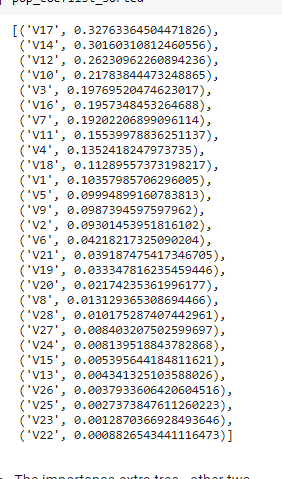

Each time remove the least important feature (20 times) like lab 1. removing least baseed on corr.

In [90]:
listoffeat=['V17', 'V14','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5','V9', 'V2','V6','V21','V19','V20','V8','V28','V27','V24','V15','V13','V26','V25','V23','V22']

In [91]:

f1_c_f=[]

for i in range(0,20):

  for comp2 in range(1,10):
    features_list,bestf1,c_number=Gaussian_FandNF(1,comp2,X_train,X_val,y_val,y_train,listoffeat)
    f1_c_f.append((features_list,c_number,bestf1))

  del listoffeat[-1]
  





In [92]:
print(f1_c_f[0])

(['V17', 'V14', 'V12', 'V10', 'V3', 'V16', 'V7', 'V11'], 6.2, 0.732394366197183)


In [93]:
len(f1_c_f)

180

In [94]:
f1_values=[]
for i in range (len(f1_c_f)):
  f1_values.append(f1_c_f[i][2])

max_value = max(f1_values)
max_index = f1_values. index(max_value) 

In [95]:
len(f1_values)

180

In [96]:
max_index

41

from that number when i=4 (4 less important features have removed) and we have 6 compents fitted on fraudulent data  (9*4+6)-1=41 (there is easier method but no time for proper code)

In [97]:
max_value

0.8503937007874015

In [98]:
print("The best model is then when -4 features least important from our dataset are gone namely 'V26','V25','V23','V22' when 6 gaussians are fitted on the Fradulent data and 1 gaussian on Non fraudulant for c=",f1_c_f[41][1],"and f1=",f1_c_f[41][2])

The best model is then when -4 features least important from our dataset are gone namely 'V26','V25','V23','V22' when 6 gaussians are fitted on the Fradulent data and 1 gaussian on Non fraudulant for c= 5.7 and f1= 0.8503937007874015


In [99]:
bestofbestfeat,bestofbestf1,bestofbestc_number=Gaussian_FandNF(1,6,X_train,X_val,y_val,y_train,['V17', 'V14','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5','V9', 'V2','V6','V21','V19','V20','V8','V28','V27','V24','V15','V13'])

In [100]:
bestofbestf1

0.8503937007874015

In [101]:
bestofbestc_number

5.7

Besst Model of set 7 that we found now is our best Model !!! We will use it in part 6 after adding it to the table 

In [101]:
mytable_summary.add_row(['Same','1','6','Removed the least 4 important features V26,V25,V23,V22 based on corroleation and part 1 ',f1_c_f[41][2],f1_c_f[41][1],np.nan]) 

In [102]:
print(mytable_summary)

+-------------------------------------------+---------------------------------+-----------------------------+------------------------------------------------------------------------------------------+--------------------+--------------------+----------------------------------+
|                   Model                   | Number of cluster on Non-fraud  | Number of cluster on Fraud  |                                     Features fitted                                      |   Best f1 score    |      c value       | AUC score on validation features |
+-------------------------------------------+---------------------------------+-----------------------------+------------------------------------------------------------------------------------------+--------------------+--------------------+----------------------------------+
| Gaussians fitted on Fraud alone/non Fraud |                1                |              3              |                                      ['V14', 'V17']     

This is indeed the best model ! (last row) so let's test it . We will also test our top 2 model since its performance is also good with f1

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


Top 1 model last row in table

In [103]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train[['V17', 'V14','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5','V9', 'V2','V6','V21','V19','V20','V8','V28','V27','V24','V15','V13']][y_train==0].to_numpy())               

G2 = GaussianMixture(n_components = 6,
                    covariance_type = 'full', random_state=0, )
G2.fit(X_train[['V17', 'V14','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5','V9', 'V2','V6','V21','V19','V20','V8','V28','V27','V24','V15','V13']][y_train==1].to_numpy())  

S1 = G1.score_samples(X_test[['V17', 'V14','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5','V9', 'V2','V6','V21','V19','V20','V8','V28','V27','V24','V15','V13']].to_numpy())                 
S2= G2.score_samples(X_test[['V17', 'V14','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5','V9', 'V2','V6','V21','V19','V20','V8','V28','V27','V24','V15','V13']].to_numpy())

f1 = f1_score(y_test, S1<5.7*S2)
precision = precision_score(y_test,S1<5.7*S2)
recall = recall_score(y_test,S1<5.7*S2)

print('The best f1 score is:',f1)
print('The best precision score is:',precision)
print('The best  recall score is:',recall)

The best f1 score is: 0.802721088435374
The best precision score is: 0.8082191780821918
The best  recall score is: 0.7972972972972973


top 2 model row 4 in table

In [104]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

G1 = GaussianMixture(n_components = 1,
                    covariance_type = 'full', random_state=0, )
G1.fit(X_train[['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5']][y_train==0].to_numpy())               

G2 = GaussianMixture(n_components = 6,
                    covariance_type = 'full', random_state=0, )
G2.fit(X_train[['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5']][y_train==1].to_numpy())  

S1 = G1.score_samples(X_test[['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5']].to_numpy())                 
S2= G2.score_samples(X_test[['V15', 'V17','V12','V10','V3','V16','V7','V11','V4','V18','V1','V5']].to_numpy())

f1 = f1_score(y_test, S1<4.4*S2)
precision = precision_score(y_test,S1<4.4*S2)
recall = recall_score(y_test,S1<4.4*S2)

print('The best f1 score is:',f1)
print('The best precision score is:',precision)
print('The best  recall score is:',recall)

The best f1 score is: 0.8053691275167786
The best precision score is: 0.8
The best  recall score is: 0.8108108108108109


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references. 




Other distributions (discrete and continuous) that could be used to model the data are:
- Bernoulli Distribution (discrete): any event with two outcomes can be modelled into a Bernouilli Distribution.
- Binomial Distribution(discrete):when carrying out the same experiment several times in a row. two outcome per iterations like Bernouilli but we have many iterations.
- Poisson Distribution(discrete): how unusual an even frequency is given an interval
-Chi-squared not used for real life events but it is used in hypothesis testing to help determine how well is a fit 
- Uniform Distribution
- Exponential Distribution: when deadling with events rapidly changing
ect.
-Logistic: for forecast analysis.
How can we find a suitable distribution to model our data? It really depends on the type of data we are dealing. first we should see if continuous or not, how the problem's outcome can be moddelled and after that I explained each distribution application in this paragraph.


for imbalanced data like here fraud case data where less than 1% of our data is fraudulent we use those distributions:

- Gamma distribution (found in recent literature https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8528358)
- SMOTE(Synthetic Minority Oversampling Technique): used in data science to also for Imbalanced Classification (Python).In SMOTE we synthesize elements for the minority class, in the vicinity of already existing elements.
- Gumbel distribution also used for unbalanced data : https://www.researchgate.net/publication/346857601_GRP_A_Gumbel-based_Rating_Prediction_Framework_for_Imbalanced_Recommendation

The most popular distribution aside from the techniques used for Imbalanced Classification is SMOTE.Oversampling using (blind copy), Ensemble
and Focal loss are also  used: https://www.youtube.com/watch?v=JnlM4yLFNuo .



-T distribution that is a small sample approx. of Normal ditsurbutions that accomodates extreme values significantly better than normal dist. so it is not so suited for our application where we want to minimize the probability for outliers!

-other techniques like  Random Over/under-Samplingc, Cluster-Based Over Sampling,Informed Over Sampling .. are also used dfor imbalanced data

and many more but those one aare the most common 

Those distributions are non normal as Gaussian distribution also called Normal distribution (hence the name normal since it is often observed in nature) that represents the behavior of most of the situations in the universe. Every sum (if n is large enough) of any errors can be proven to be proven to be modelled by a normal distribution. So extreme values will be outliers when fitting a Gaussian since they so not feature very frequently in normal distrubution. There is also the Student's T distribution that is a small sample approx. of Normal ditsurbutions 

References: 
https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html

https://arxiv.org/abs/2012.05009

https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8528358

https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

https://www.youtube.com/watch?v=JnlM4yLFNuo